# <center><i><b><u>PREDICT SHIPPING DELAYS</i></b></u></center>

# <i>BUSINESS PROBLEM

Problem Statement (Business Need)<br>
Shipping delays significantly impact logistics and supply chain management, leading to customer dissatisfaction, financial losses, and inefficiencies. E-commerce and logistics companies need to ensure on-time deliveries while managing factors like traffic, weather, warehouse processing, and shipping method selection.


# <i>PROBLEM STATEMENT</i>

Prediction/classification of shipping delays using Machine Learning.

Unforeseen delays can lead to customer dissatisfaction, increased operational costs, and inefficiencies in supply chain management.

Goal: Build a Machine Learning model that can classify shipments as "Delayed" or "On-Time" based on historical shipment data. This predictive system will help logistics companies:<br>
Optimize shipping schedules and routes.<br>
Improve warehouse and inventory management.<br>
Enhance customer satisfaction by providing real-time delay predictions.<br>

# <i> IMPORT LIBRARIES</i>

In [1]:
#for numerical data
import numpy as np
#for analysis and manipulation of structured data
import pandas as pd

#for visualization
import matplotlib.pyplot as plt
import seaborn as sns

#normality
import scipy
#hypothesis
from scipy.stats import shapiro

#train test split
from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV

#model training
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier,plot_tree
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

#model evaluation
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

#pickle file
import pickle

#vif
from statsmodels.stats.outliers_influence import variance_inflation_factor
#for ignoring warnings
import warnings as wr
wr.filterwarnings('ignore')

# <i>DATA GATHERING</i>

### LOAD DATASET


1. Understand the Dataset<br>
Load Data: Import the dataset using libraries like pandas.

In [2]:
df=pd.read_csv(r"C:\Users\Disha Katare\Desktop\P315_Disha\ML\dataset\shipping_delay_data.csv")

### PREVIWEING ON DATA

Preview Data: Look at the first few rows to get an idea of the dataset.

In [3]:
df.head()

,Product Category,Product Weight,Shipping Method,Distance,Number of Items in Shipment,Mode of shipping,Origin City,Destination City,Weather Conditions,Holiday Indicator,Warehouse Processing Time,Traffic Conditions,Delay (Target Variable)
0,Clothing,21.10,Overnight,2747,10,Ground,Houston,Los Angeles,Snow,0,2,Low,1
1,Furniture,13.64,Standard,3810,8,Air,Chicago,San Francisco,Fog,0,3,High,1
2,Furniture,17.35,Express,1344,2,Ground,Houston,New York,Storm,1,3,High,1
3,Books,14.90,Standard,2504,7,Ground,Los Angeles,Chicago,Snow,1,2,High,1
4,Furniture,21.70,Express,3628,1,Air,Houston,Los Angeles,Clear,1,1,Moderate,1


In [4]:
df.tail()

,Product Category,Product Weight,Shipping Method,Distance,Number of Items in Shipment,Mode of shipping,Origin City,Destination City,Weather Conditions,Holiday Indicator,Warehouse Processing Time,Traffic Conditions,Delay (Target Variable)
1995,Toys,30.31,Express,1445,4,Air,San Francisco,Houston,Rain,0,1,Moderate,1
1996,Books,1.26,Overnight,4959,9,Air,Los Angeles,Houston,Clear,0,1,High,1
1997,Furniture,5.79,Express,1975,5,Air,Houston,New York,Fog,1,4,Moderate,1
1998,Electronics,48.19,Express,2721,4,Air,Chicago,Houston,Rain,0,2,Moderate,1
1999,Furniture,46.23,Express,4798,4,Ground,San Francisco,Houston,Clear,1,4,Moderate,1


# <i>EDA (Exploratory Data Analysis)</i>

### BASIC INFORMATION

Shape of Data: Total rows and columns in dataset

In [5]:
rows,columns=df.shape
print("Number of total rows:",rows)
print("Number of total columns:",columns)

Number of total rows: 2000
Number of total columns: 13


Size of Data:Total datapoints in dataset

In [6]:
datapoints=df.size
print("Total datapoints in dataset:",datapoints)

Total datapoints in dataset: 26000


Summary of Data: General info about non-null values and memory usage.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Product Category             2000 non-null   object 
 1   Product Weight               2000 non-null   float64
 2   Shipping Method              2000 non-null   object 
 3   Distance                     2000 non-null   int64  
 4   Number of Items in Shipment  2000 non-null   int64  
 5   Mode of shipping             2000 non-null   object 
 6   Origin City                  2000 non-null   object 
 7   Destination City             2000 non-null   object 
 8   Weather Conditions           2000 non-null   object 
 9   Holiday Indicator            2000 non-null   int64  
 10  Warehouse Processing Time    2000 non-null   int64  
 11  Traffic Conditions           2000 non-null   object 
 12  Delay (Target Variable)      2000 non-null   int64  
dtypes: float64(1), int

DataTypes of each columns

In [8]:
df.dtypes

Product Category                object
Product Weight                 float64
Shipping Method                 object
Distance                         int64
Number of Items in Shipment      int64
Mode of shipping                object
Origin City                     object
Destination City                object
Weather Conditions              object
Holiday Indicator                int64
Warehouse Processing Time        int64
Traffic Conditions              object
Delay (Target Variable)          int64
dtype: object

Listing Columns Name

In [9]:
df.columns

Index(['Product Category', 'Product Weight', 'Shipping Method', 'Distance',
       'Number of Items in Shipment', 'Mode of shipping', 'Origin City',
       'Destination City', 'Weather Conditions', 'Holiday Indicator',
       'Warehouse Processing Time', 'Traffic Conditions',
       'Delay (Target Variable)'],
      dtype='object')

Rows in Dataset

In [10]:
df.axes[0]

RangeIndex(start=0, stop=2000, step=1)

Converting data for 1 and 0 as yes and no

In [11]:
def conv(value):
    if value==1:
        return "yes"
    else:
        return "no"
    
df["Holiday Indicator"]=df["Holiday Indicator"].apply(conv)
df["Delay (Target Variable)"]=df["Delay (Target Variable)"].apply(conv)

### DESCRIPTIVE STATISTICS

Summary Statistics for Numerical Data

In [12]:
df.describe()

,Product Weight,Distance,Number of Items in Shipment,Warehouse Processing Time
count,2000.000000,2000.00000,2000.000000,2000.000000
mean,25.648055,2470.08000,5.499000,2.546500
std,14.292400,1412.65427,2.880477,1.115105
min,0.500000,54.00000,1.000000,1.000000
25%,13.227500,1228.25000,3.000000,2.000000
50%,25.725000,2473.50000,6.000000,3.000000
75%,38.170000,3649.00000,8.000000,4.000000
max,49.970000,5000.00000,10.000000,4.000000


Summary Statistics for Categorical Data

In [13]:
df.describe(include='object')

,Product Category,Shipping Method,Mode of shipping,Origin City,Destination City,Weather Conditions,Holiday Indicator,Traffic Conditions,Delay (Target Variable)
count,2000,2000,2000,2000,2000,2000,2000,2000,2000
unique,5,3,3,5,5,5,2,3,2
top,Books,Standard,Air,New York,New York,Fog,no,High,yes
freq,414,680,693,413,411,415,1017,696,1198


### DATA CLEANING

### MISSING VALUES

Identify Missing Data

In [14]:
df.isnull()

,Product Category,Product Weight,Shipping Method,Distance,Number of Items in Shipment,Mode of shipping,Origin City,Destination City,Weather Conditions,Holiday Indicator,Warehouse Processing Time,Traffic Conditions,Delay (Target Variable)
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,False,False,False,False,False,False,False,False,False,False,False,False,False
1996,False,False,False,False,False,False,False,False,False,False,False,False,False
1997,False,False,False,False,False,False,False,False,False,False,False,False,False
1998,False,False,False,False,False,False,False,False,False,False,False,False,False


In [15]:
df.isnull().sum()

Product Category               0
Product Weight                 0
Shipping Method                0
Distance                       0
Number of Items in Shipment    0
Mode of shipping               0
Origin City                    0
Destination City               0
Weather Conditions             0
Holiday Indicator              0
Warehouse Processing Time      0
Traffic Conditions             0
Delay (Target Variable)        0
dtype: int64

Checking using visualization if any missing value(heatmap)

<Axes: >

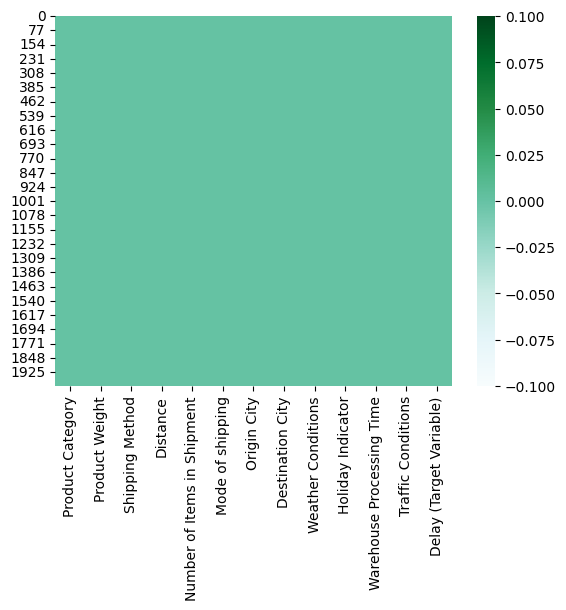

In [16]:
sns.heatmap(df.isnull(),cmap="BuGn")

Visualization showing no null values as same shade of 0.00 for entire heatmap

As there are no missing values no need to handle them

### DUPLICATE VALUES

Find Duplicates

In [17]:
df.duplicated().sum()

np.int64(0)

No duplicates found

### NUMERICAL DATA ANALYSIS

Identify Numerical Columns

In [18]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("\tNumerical Colums are as below")
for i in numerical_columns:
    print("\t",i)
print("\nTotal Numerical columns:",len(numerical_columns))

	Numerical Colums are as below
	 Product Weight
	 Distance
	 Number of Items in Shipment
	 Warehouse Processing Time

Total Numerical columns: 4


Statistical information about numerical columns

In [19]:
stat={}
for n in numerical_columns:
    stat[n]={
    "Mean":df[n].mean(),
    "Median": df[n].median(),
    "Mode":df[n].mode()[0],
    "VARIANCE":df[n].var(),
    "Standard Deviation":df[n].std(),
    "Range":df[n].max() - df[n].min(),
    "Skewness":df[n].skew(),
    "Kurtosis":df[n].kurt()}
  

s=pd.DataFrame(stat)
s.T

,Mean,Median,Mode,VARIANCE,Standard Deviation,Range,Skewness,Kurtosis
Product Weight,25.648055,25.725,1.97,2.042727e+02,14.292400,49.47,-0.026007,-1.225628
Distance,2470.080000,2473.500,113.00,1.995592e+06,1412.654270,4946.00,0.026312,-1.172326
Number of Items in Shipment,5.499000,6.000,8.00,8.297148e+00,2.880477,9.00,-0.020653,-1.259894
Warehouse Processing Time,2.546500,3.000,4.00,1.243459e+00,1.115105,3.00,-0.048646,-1.351846


### UNIVARIATE ANALYSIS

In [20]:
def random_hex_color():
    return "#{:06x}".format(np.random.randint(0, 0xFFFFFF))

Histograms show the distribution of numerical features.

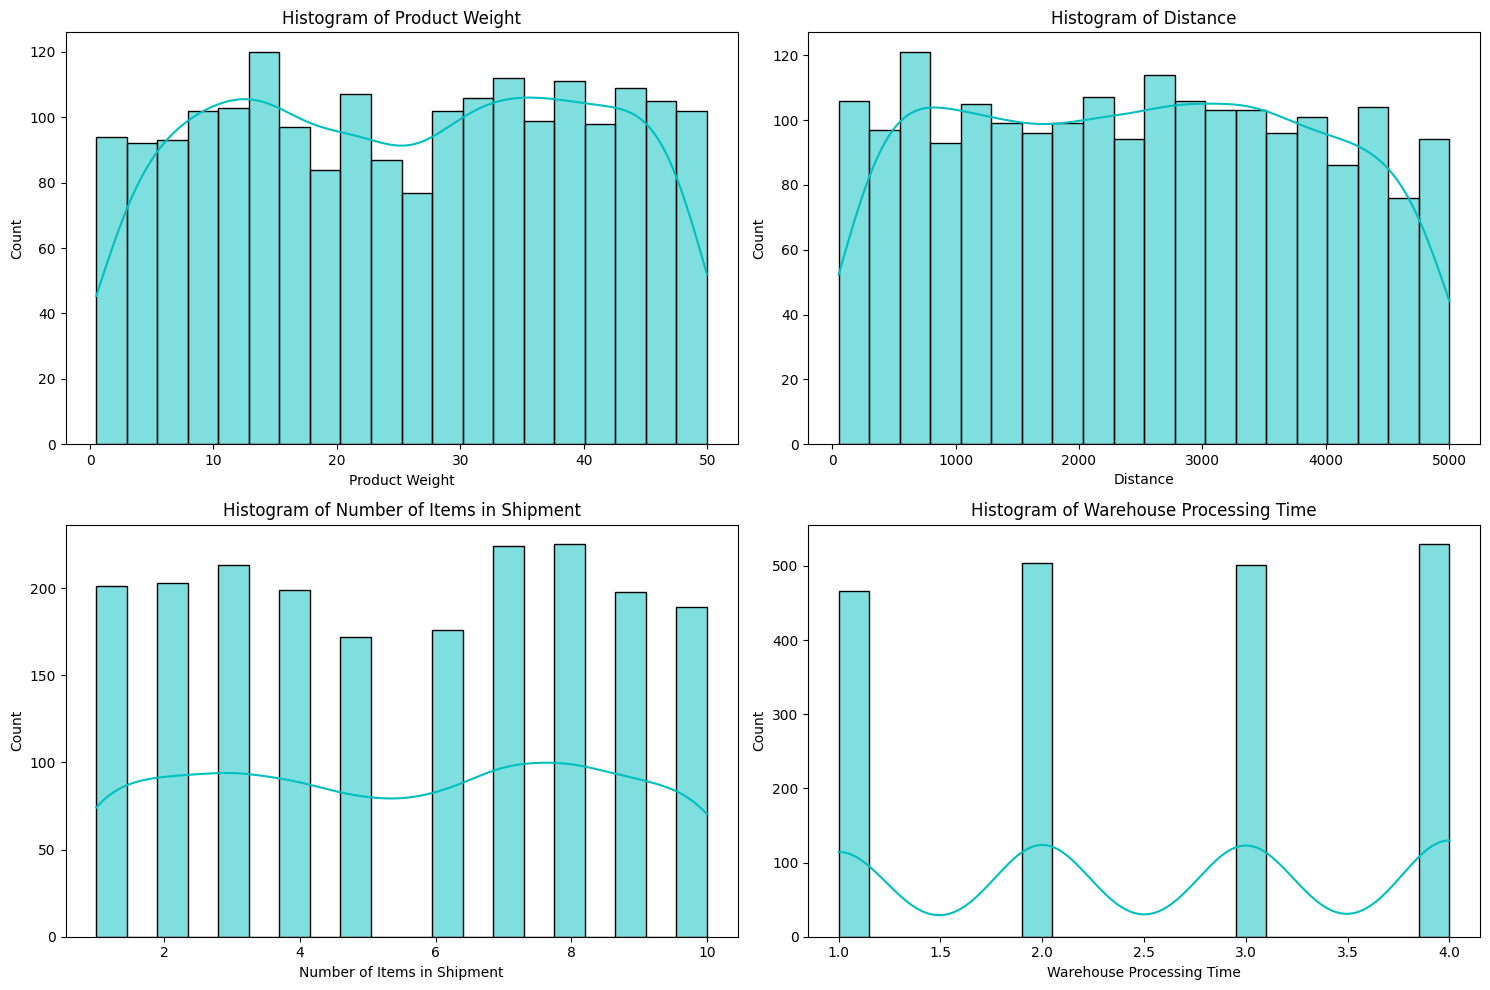

In [21]:
def plot_histograms(df):
    columns = numerical_columns
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))

    for i, col in enumerate(columns):
        row, col_idx = i // 2, i % 2
        sns.histplot(df[col], bins=20, kde=True, ax=axes[row, col_idx], color="c")
        axes[row, col_idx].set_title(f"Histogram of {col}")

    plt.tight_layout()
    plt.show()


plot_histograms(df)


Strip plots help visualize data distribution and density for numerical features.<br> The jittered points allow you to see overlapping values better than a standard scatter plot.

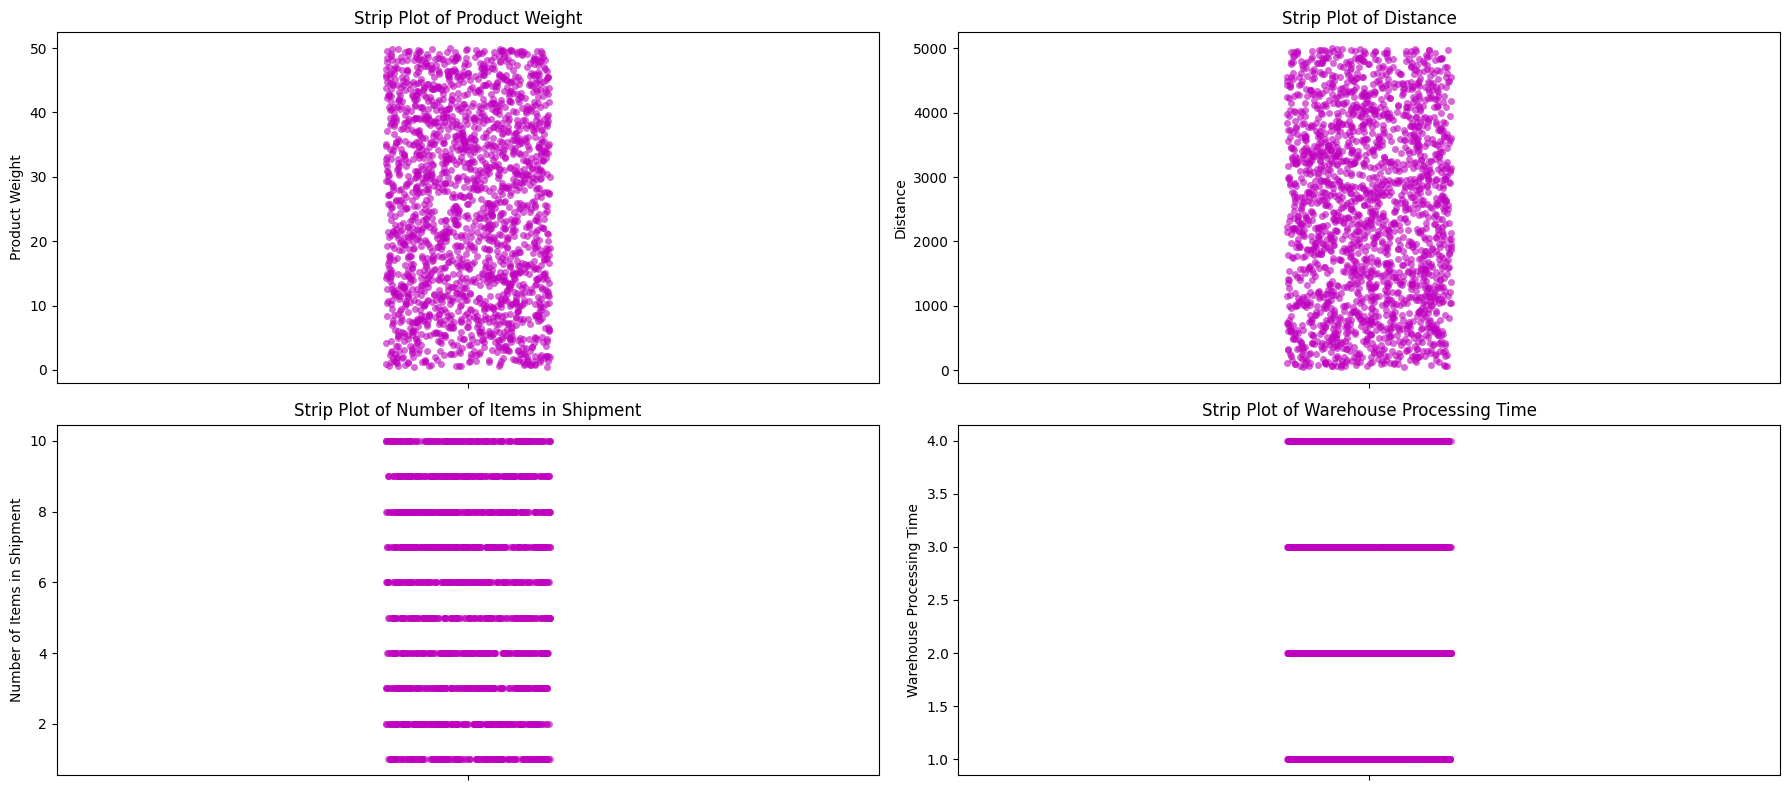

In [22]:
def plot_strip_plots(df):
    fig, axes = plt.subplots(2, 2, figsize=(18,8)) 

    for i, col in enumerate(numerical_columns):
        row, col_idx = i // 2, i % 2 
        sns.stripplot(y=df[col], ax=axes[row, col_idx], jitter=True, color="m", alpha=0.6)
        axes[row, col_idx].set_title(f"Strip Plot of {col}")

    plt.tight_layout()
    plt.show()


plot_strip_plots(df)


ECDF plots show the cumulative probability distribution of numerical data, helping to understand how values are spread.

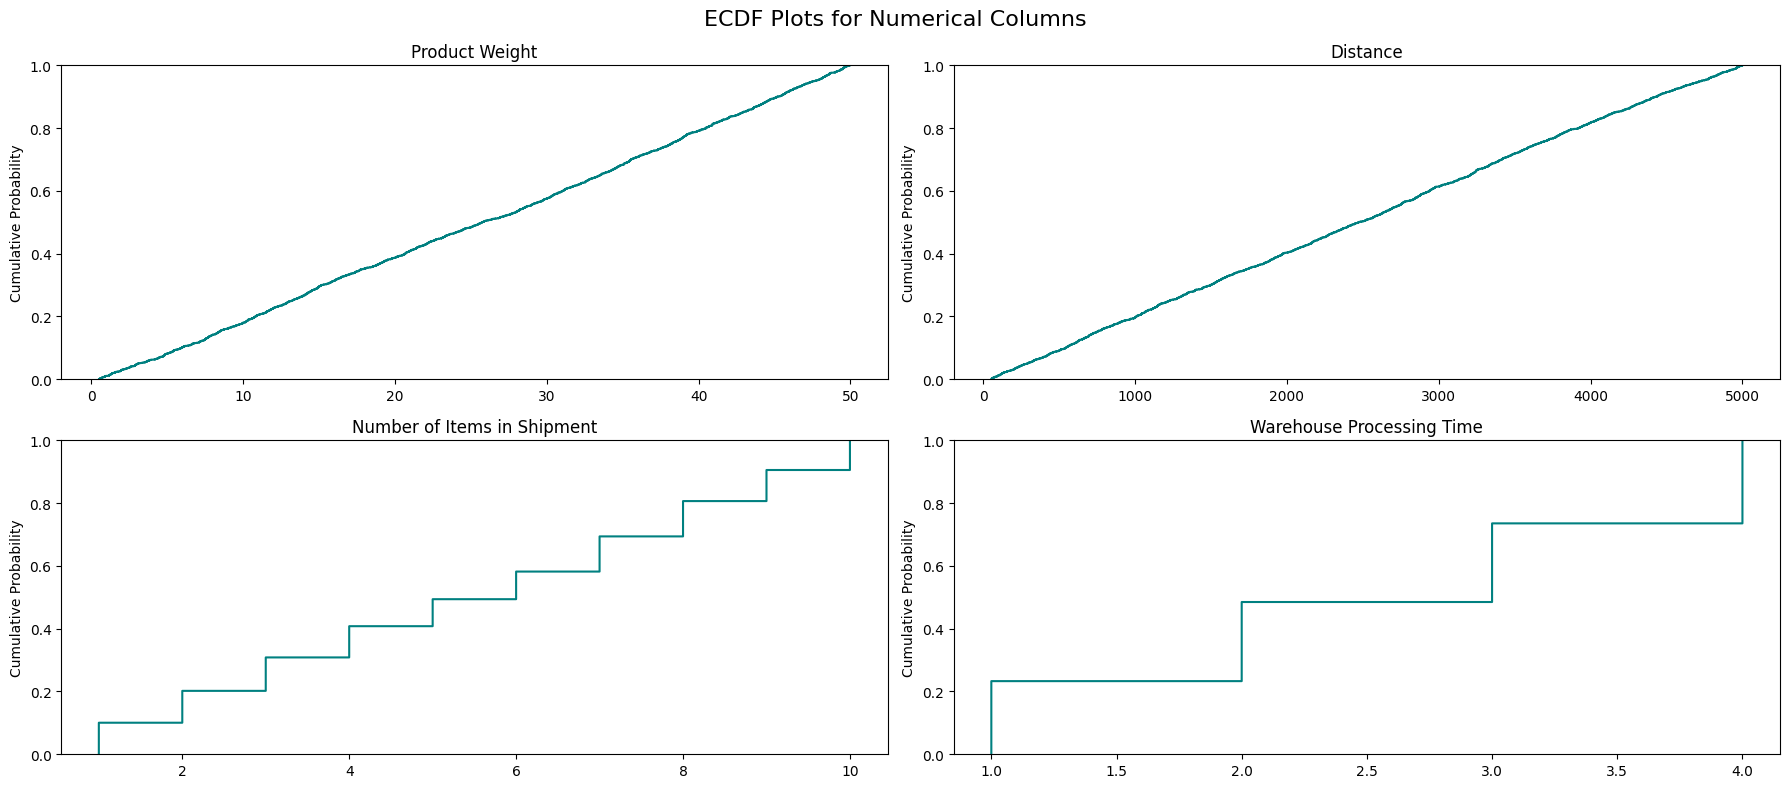

In [23]:
fig, axes = plt.subplots(2, 2, figsize=(18, 8))
fig.suptitle('ECDF Plots for Numerical Columns', fontsize=16)


axes = axes.flatten()


for i, col in enumerate(numerical_columns):
    sns.ecdfplot(df[col], ax=axes[i], color='teal')
    axes[i].set_title(col)
    axes[i].set_xlabel('') 
    axes[i].set_ylabel('Cumulative Probability')


plt.tight_layout()
plt.show()


Swarm plots are useful for visualizing individual data points while preserving data density and distribution.

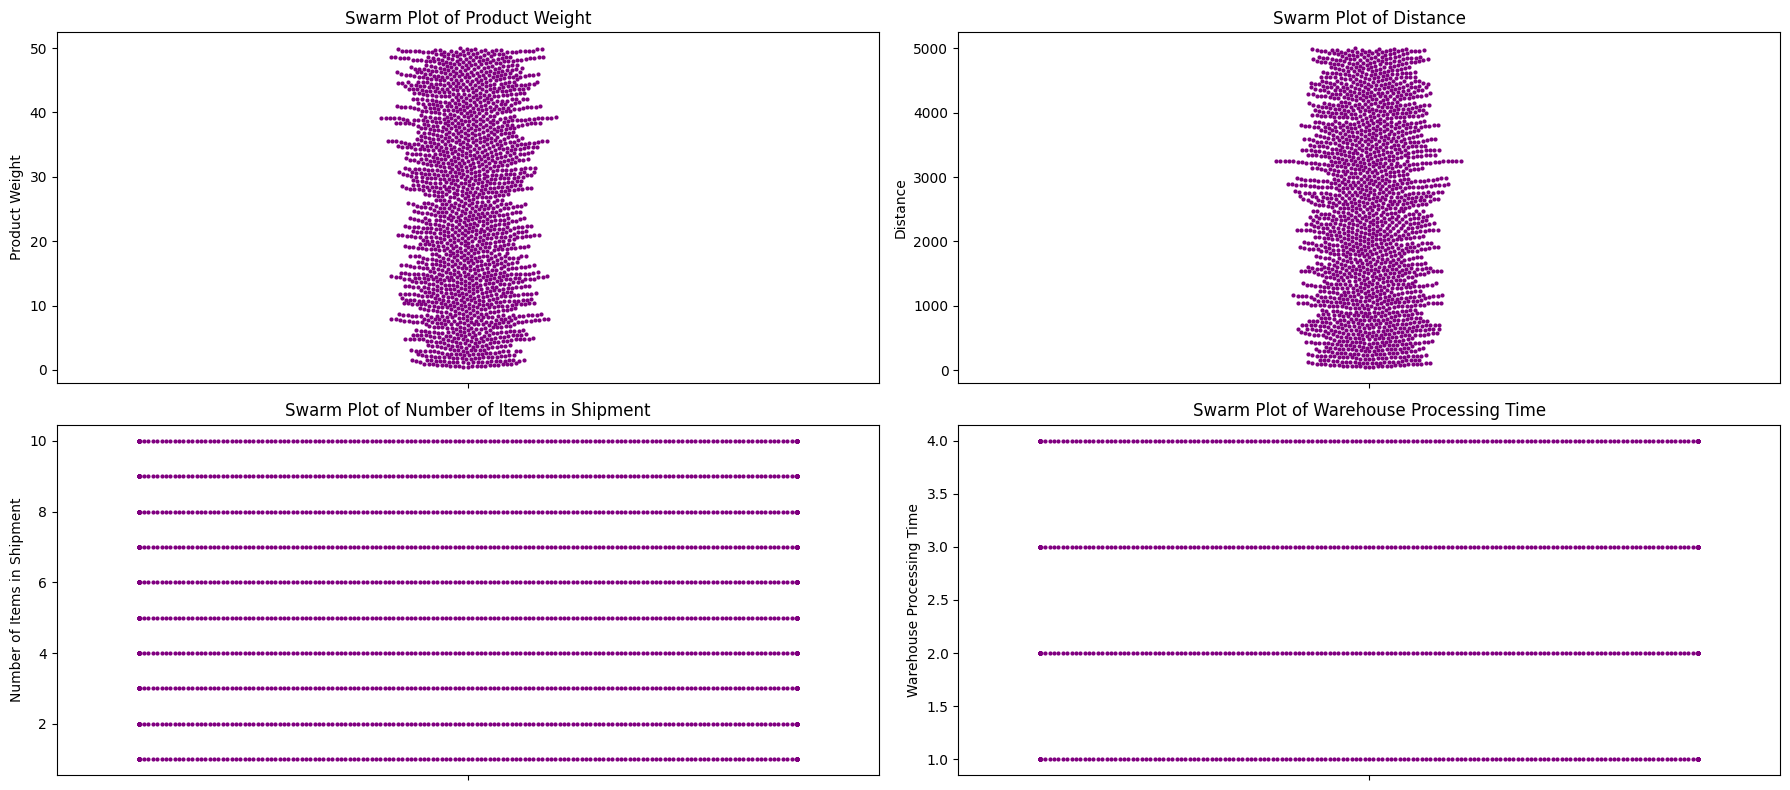

In [24]:
def plot_swarm_plots(df):
    
    fig, axes = plt.subplots(2, 2, figsize=(18, 8))

    for i, col in enumerate(numerical_columns):
        row, col_idx = i // 2, i % 2
        sns.swarmplot(y=df[col], ax=axes[row, col_idx], color="purple", size=3)
        axes[row, col_idx].set_title(f"Swarm Plot of {col}")

    plt.tight_layout()
    plt.show()


plot_swarm_plots(df)


A violin plot is a combination of a box plot and a density plot, showing both the distribution and probability density of numerical data.

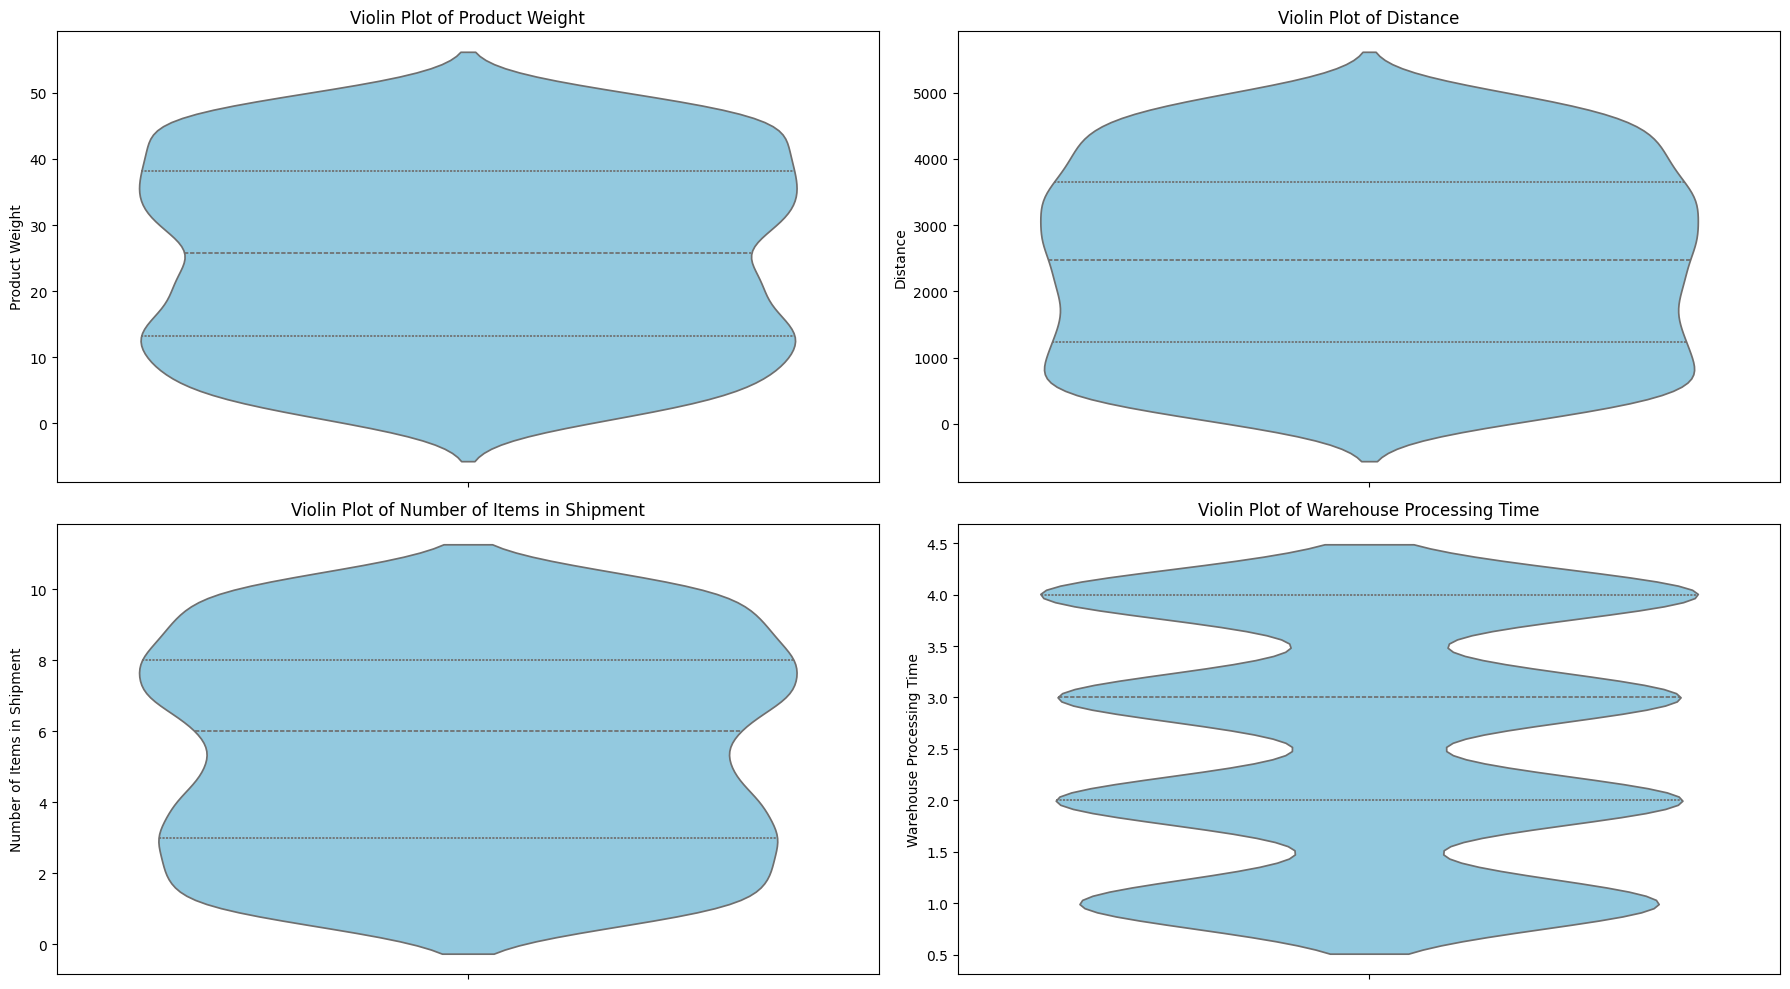

In [25]:
def plot_violin_plots(df):
    
    fig, axes = plt.subplots(2, 2, figsize=(18, 10))  # 2 rows, 3 columns
    axes = axes.flatten()  # Flatten axes array for easy iteration

    for i, col in enumerate(numerical_columns):
        sns.violinplot(y=df[col], ax=axes[i], color="skyblue", inner="quartile")
        axes[i].set_title(f"Violin Plot of {col}")

    plt.tight_layout()
    plt.show()

plot_violin_plots(df)


### BIVARIATE ANALYSIS

Below visualization helps in understanding the relationship between numerical variables using scatter plots and regression lines.

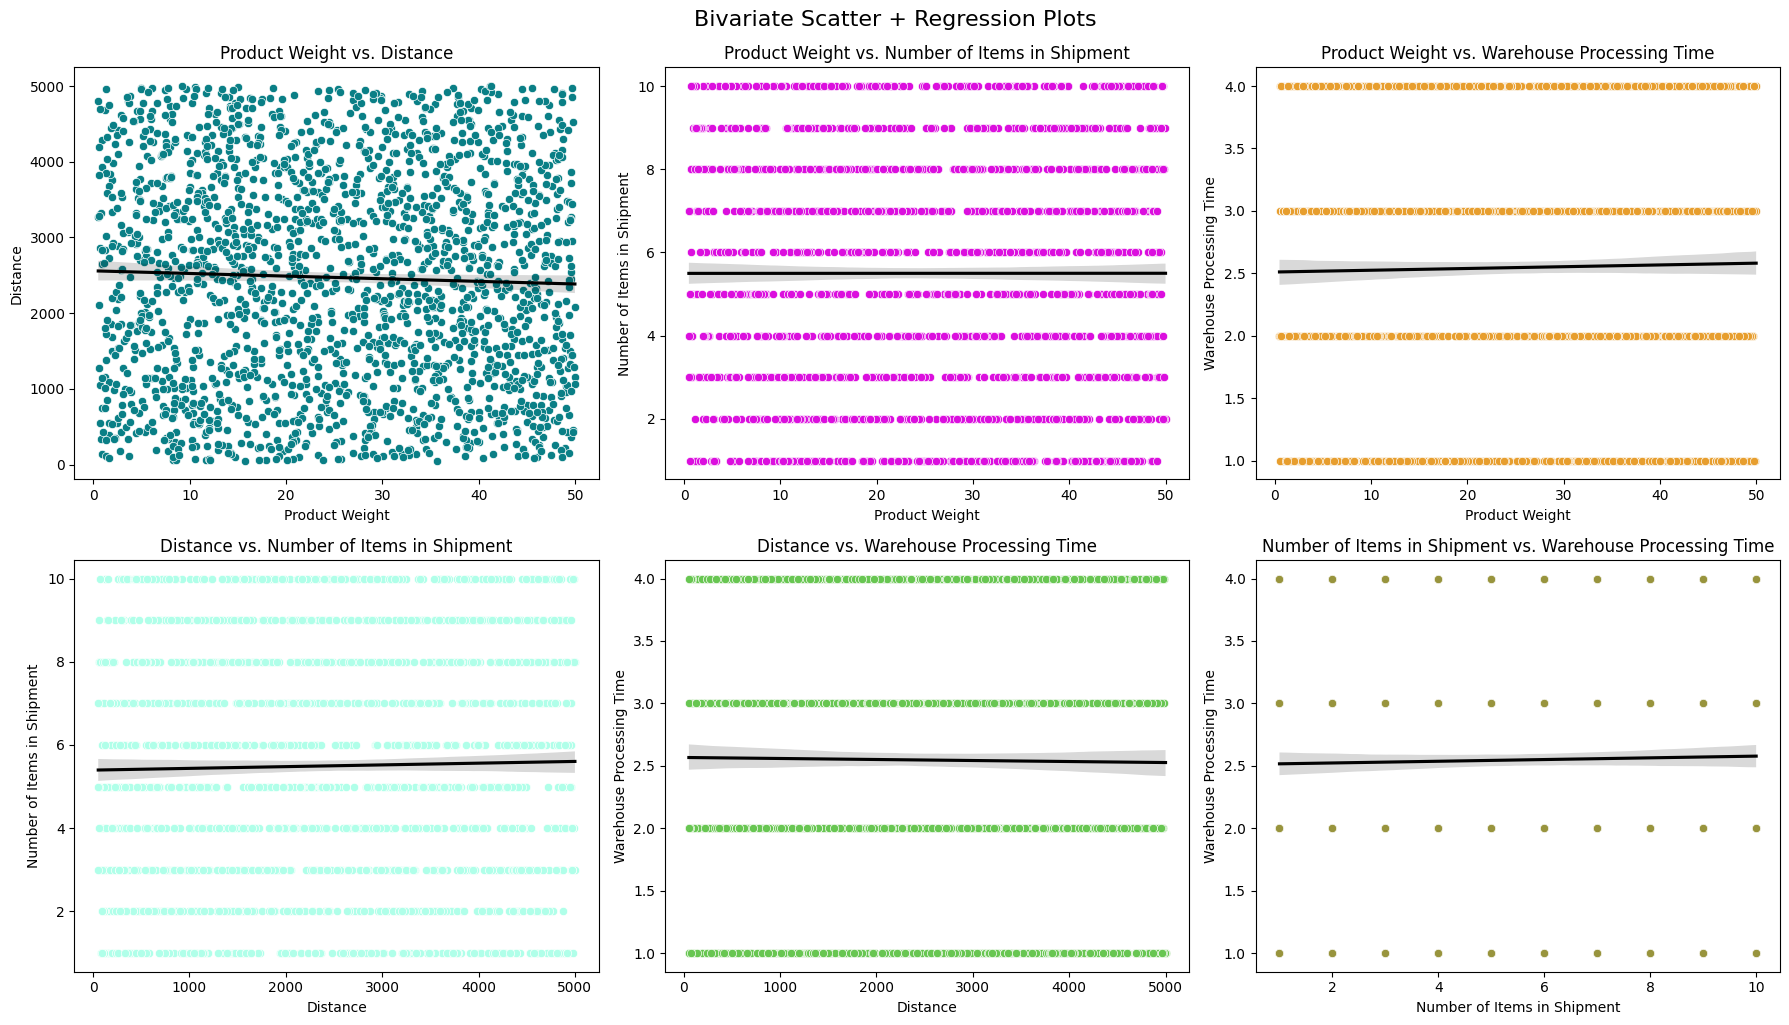

In [26]:
import itertools


combinations = list(itertools.combinations(numerical_columns, 2))


n_cols = 3
n_rows = (len(combinations) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
axes = axes.flatten()

for i, (col1, col2) in enumerate(combinations):
    sns.scatterplot(x=df[col1], y=df[col2], ax=axes[i], color=random_hex_color())
    sns.regplot(x=df[col1], y=df[col2], ax=axes[i], scatter=False, color='black')  
    axes[i].set_title(f'{col1} vs. {col2}')


plt.tight_layout()
plt.suptitle('Bivariate Scatter + Regression Plots', fontsize=16, y=1.02)
plt.show()


A Hexbin Plot is useful for visualizing density distributions between two numerical variables

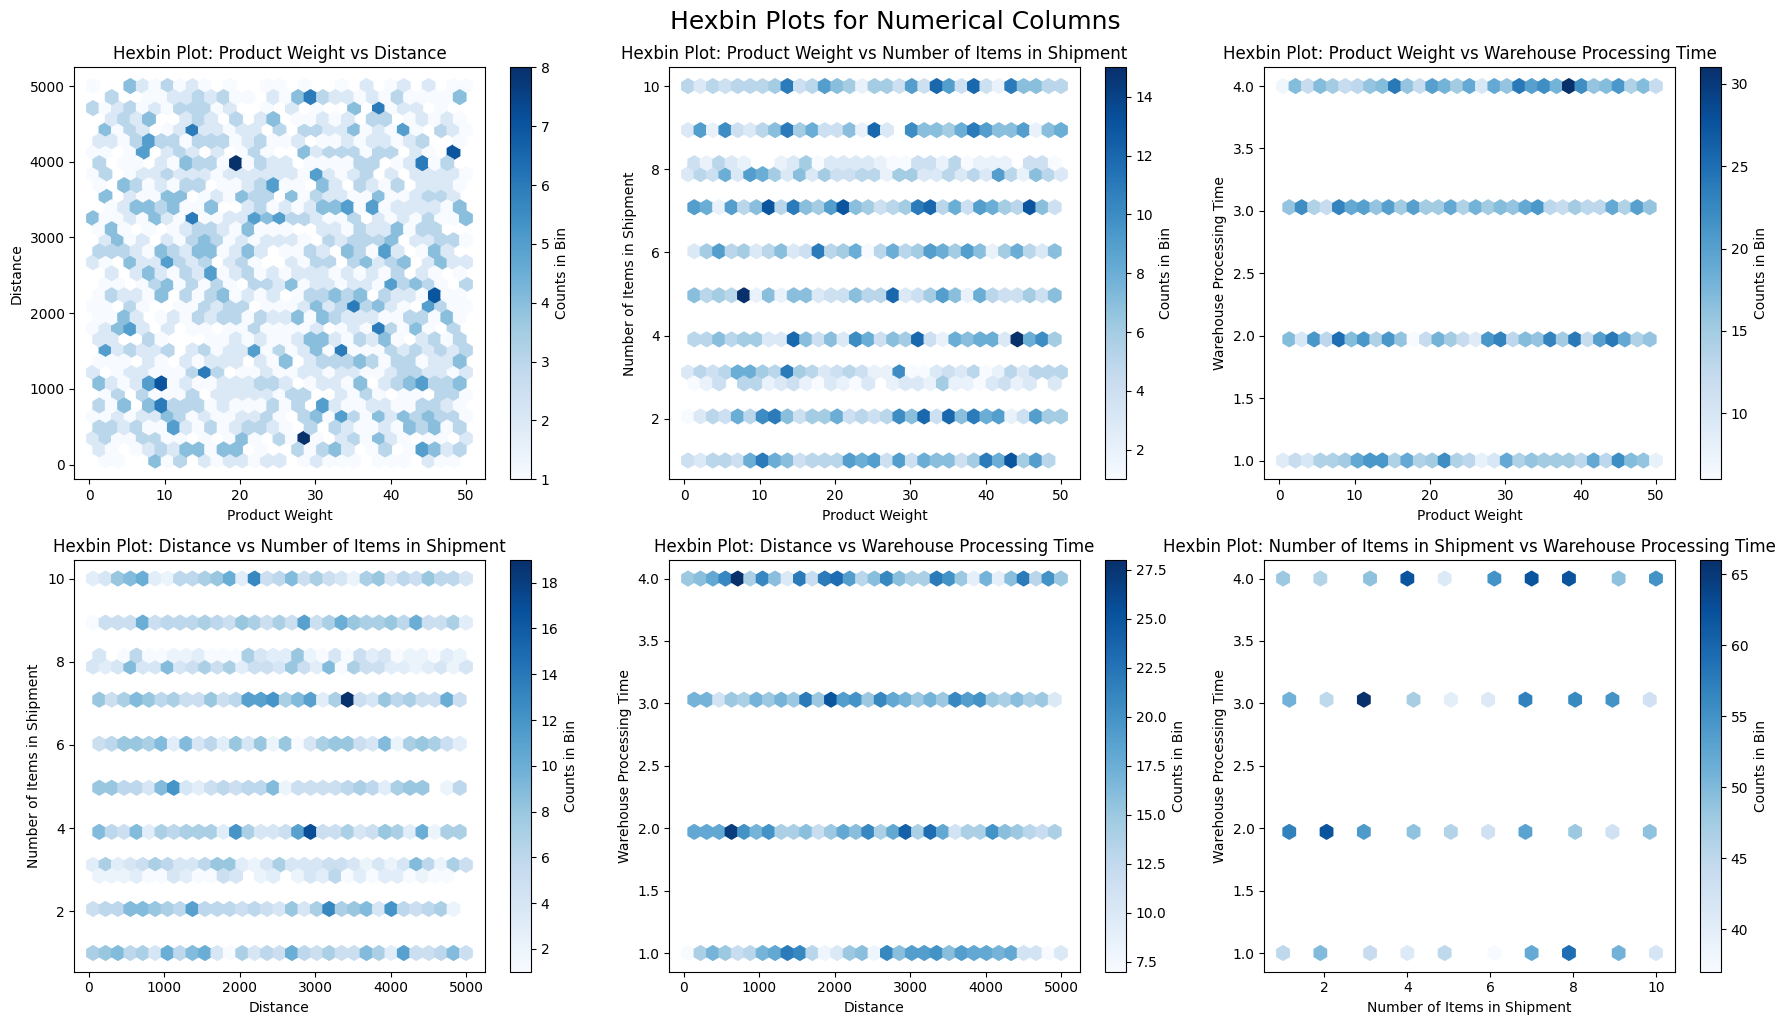

In [27]:
combinations = list(itertools.combinations(numerical_columns, 2))


n_cols = 3  
n_rows = (len(combinations) + n_cols - 1) // n_cols  

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
axes = axes.flatten()


for i, (col1, col2) in enumerate(combinations):
    hb = axes[i].hexbin(df[col1], df[col2], gridsize=30, cmap='Blues', mincnt=1)
    axes[i].set_xlabel(col1)
    axes[i].set_ylabel(col2)
    axes[i].set_title(f'Hexbin Plot: {col1} vs {col2}')
    

    cb = fig.colorbar(hb, ax=axes[i], orientation='vertical')
    cb.set_label('Counts in Bin')

plt.tight_layout()
plt.suptitle('Hexbin Plots for Numerical Columns', fontsize=18, y=1.02)
plt.show()


### Covariance

In [28]:
df_numeric = df.select_dtypes(include=['number'])
cov_matrix = df_numeric.cov()
cov_matrix

,Product Weight,Distance,Number of Items in Shipment,Warehouse Processing Time
Product Weight,204.272695,-7.100223e+02,0.010596,0.289593
Distance,-710.022306,1.995592e+06,83.289725,-16.215328
Number of Items in Shipment,0.010596,8.328972e+01,8.297148,0.056825
Warehouse Processing Time,0.289593,-1.621533e+01,0.056825,1.243459


### Correlation

In [29]:
df_numeric = df.select_dtypes(include=['number'])
corr_matrix = df_numeric.corr()
corr_matrix

,Product Weight,Distance,Number of Items in Shipment,Warehouse Processing Time
Product Weight,1.000000,-0.035167,0.000257,0.018170
Distance,-0.035167,1.000000,0.020469,-0.010294
Number of Items in Shipment,0.000257,0.020469,1.000000,0.017691
Warehouse Processing Time,0.018170,-0.010294,0.017691,1.000000


### HeatMap showing correlation

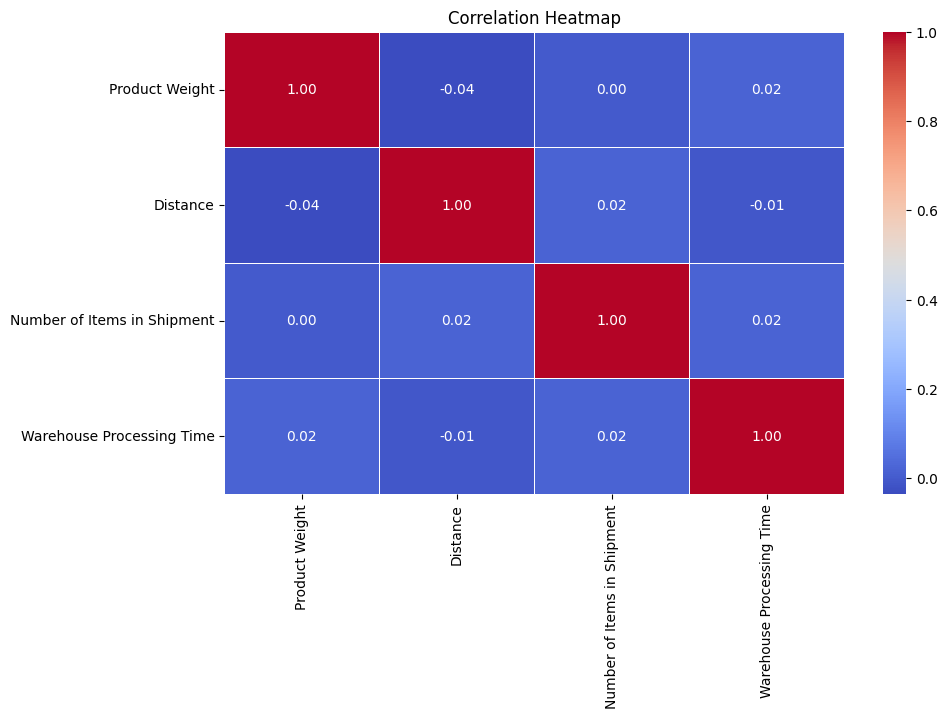

In [30]:
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


### To Check normality of columns

### Zscore

In [31]:
for c in numerical_columns:
    print(f"Zscore in {c}")
    zscore=scipy.stats.zscore(df[c])
    print(zscore)
    print("-"*50)

Zscore in Product Weight
[-0.31829451 -0.84038078 -0.58073734 ... -1.3897611   1.57759248
  1.44042236]
--------------------------------------------------
Zscore in Distance
[ 0.19607717  0.94874955 -0.79733708 ... -0.35054849  0.1776675
  1.64831711]
--------------------------------------------------
Zscore in Number of Items in Shipment
[ 1.56297923  0.86847613 -1.21503317 ... -0.17327852 -0.52053007
 -0.52053007]
--------------------------------------------------
Zscore in Warehouse Processing Time
[-0.49021088  0.40678982  0.40678982 ...  1.30379052 -0.49021088
  1.30379052]
--------------------------------------------------


### Hypotesis Testing

In [32]:
def check_normal_dist(col):
    stat,p_value=shapiro(df[col])
    print(f"P Value:{p_value}")
    if p_value >=0.05:
        print(f"Data normally distributed in column {col}")
    else:
         print(f"Data not nomally distributed in column {col}")

In [33]:
for c in numerical_columns:
    print(f"{c}")
    check_normal_dist(c)
    print("-"*50)

Product Weight
P Value:7.381423205192289e-25
Data not nomally distributed in column Product Weight
--------------------------------------------------
Distance
P Value:1.1212180310183061e-23
Data not nomally distributed in column Distance
--------------------------------------------------
Number of Items in Shipment
P Value:3.7445009868636983e-29
Data not nomally distributed in column Number of Items in Shipment
--------------------------------------------------
Warehouse Processing Time
P Value:2.5131458216022782e-39
Data not nomally distributed in column Warehouse Processing Time
--------------------------------------------------


## Visual Representation of Normality distribution of each numerical column

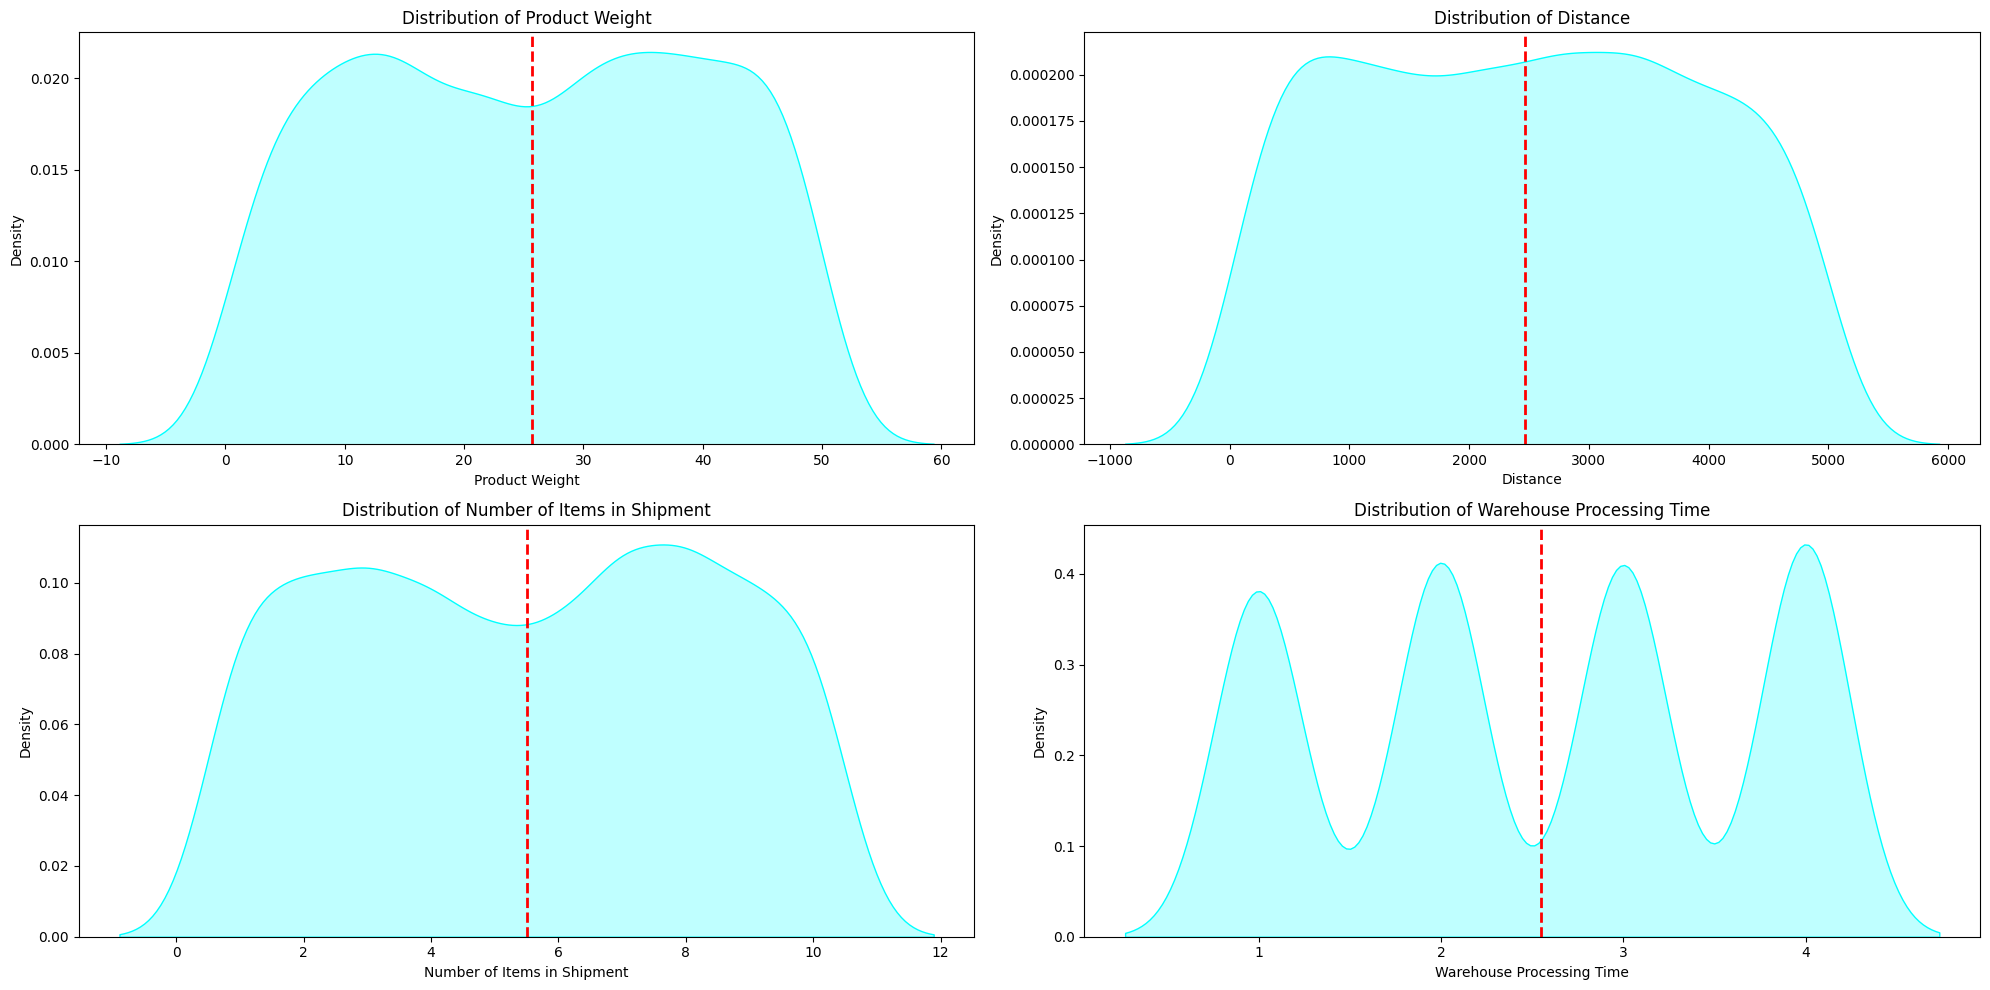

In [34]:
fig, axes = plt.subplots(2,2, figsize=(20, 10))
axes=axes.flatten()

for i, c in enumerate(numerical_columns):
        sns.kdeplot(df[c],ax=axes[i],color="cyan",fill=True)
        axes[i].set_title(f"Distribution of {c}")
        mean_value = df[c].mean()
        axes[i].axvline(mean_value, color='red', linestyle='--', linewidth=2)

plt.tight_layout()
plt.show()

### OUTLIERS 

Identifying and Handling Outliers

In [35]:
outlier_col=[]
for c in numerical_columns:
    print("Checking for outilers for column",c)
    
    q1=df[c].quantile(0.25)
    q2=df[c].quantile(0.50)
    q3=df[c].quantile(0.75)
    iqr=q3-q1
    
    Lowertail=q1-1.5*iqr
    Uppertail=q3+1.5*iqr
    
    outliers=df[(df[c] < Lowertail) | (df[c] > Uppertail)]
    
    if outliers.empty:
        print("No outliers present")
        print("-"*50)
    else:
        sns.boxplot(y=df[c],color="LightBlue")
        plt.show()
        outlier_col.append(c)
        print("-"*50)
        print("Handling outliers of only present columns")
for c in outlier_col:
        df.loc[(df[c] < Lowertail),c] = Lowertail
        df.loc[(df[c] > Uppertail),c] = Uppertail
        print("After Handling Outliers with its lower and upper tails")
        outliers=df[(df[c] < Lowertail) | (df[c] > Uppertail)]
        print(f"Outilers of {c}\n{outliers}")
        print(f"Box plot of Column {c} after handling outiler")
        #sns.boxplot(y=df[c],color="Grey")
        print("Box Plot After Handling Outliers")
        df.head()
        #plt.show()
        print("-"*50)

Checking for outilers for column Product Weight
No outliers present
--------------------------------------------------
Checking for outilers for column Distance
No outliers present
--------------------------------------------------
Checking for outilers for column Number of Items in Shipment
No outliers present
--------------------------------------------------
Checking for outilers for column Warehouse Processing Time
No outliers present
--------------------------------------------------


## CATEGORICAL DATA ANALYSIS

Identify Numerical Columns

In [36]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
print("\tCategorical Columns are as below")
for i in categorical_columns:
    print("\t",i)
print("\nTotal Numerical columns:",len(categorical_columns))

	Categorical Columns are as below
	 Product Category
	 Shipping Method
	 Mode of shipping
	 Origin City
	 Destination City
	 Weather Conditions
	 Holiday Indicator
	 Traffic Conditions
	 Delay (Target Variable)

Total Numerical columns: 9


Statistical information about categorical columns

In [37]:
for c in categorical_columns:
    print(c)
    print(f"Number of unique values: {df[c].nunique()}")
    print(f"Unique values:{df[c].unique()}")
    print(f"Value counts:\n{df[c].value_counts()}")
    print(f"Mode value: {df[c].mode()[0]}")
    print("-"*50)

Product Category
Number of unique values: 5
Unique values:['Clothing' 'Furniture' 'Books' 'Electronics' 'Toys']
Value counts:
Product Category
Books          414
Furniture      409
Toys           404
Clothing       394
Electronics    379
Name: count, dtype: int64
Mode value: Books
--------------------------------------------------
Shipping Method
Number of unique values: 3
Unique values:['Overnight' 'Standard' 'Express']
Value counts:
Shipping Method
Standard     680
Overnight    662
Express      658
Name: count, dtype: int64
Mode value: Standard
--------------------------------------------------
Mode of shipping
Number of unique values: 3
Unique values:['Ground' 'Air' 'Sea']
Value counts:
Mode of shipping
Air       693
Ground    664
Sea       643
Name: count, dtype: int64
Mode value: Air
--------------------------------------------------
Origin City
Number of unique values: 5
Unique values:['Houston' 'Chicago' 'Los Angeles' 'New York' 'San Francisco']
Value counts:
Origin City
New Yor

UNIVARIATE ANALYSIS

Count plot visualizes the frequency distribution of different categories in a dataset. The labels on top of the bars provide exact counts, making interpretation easier.



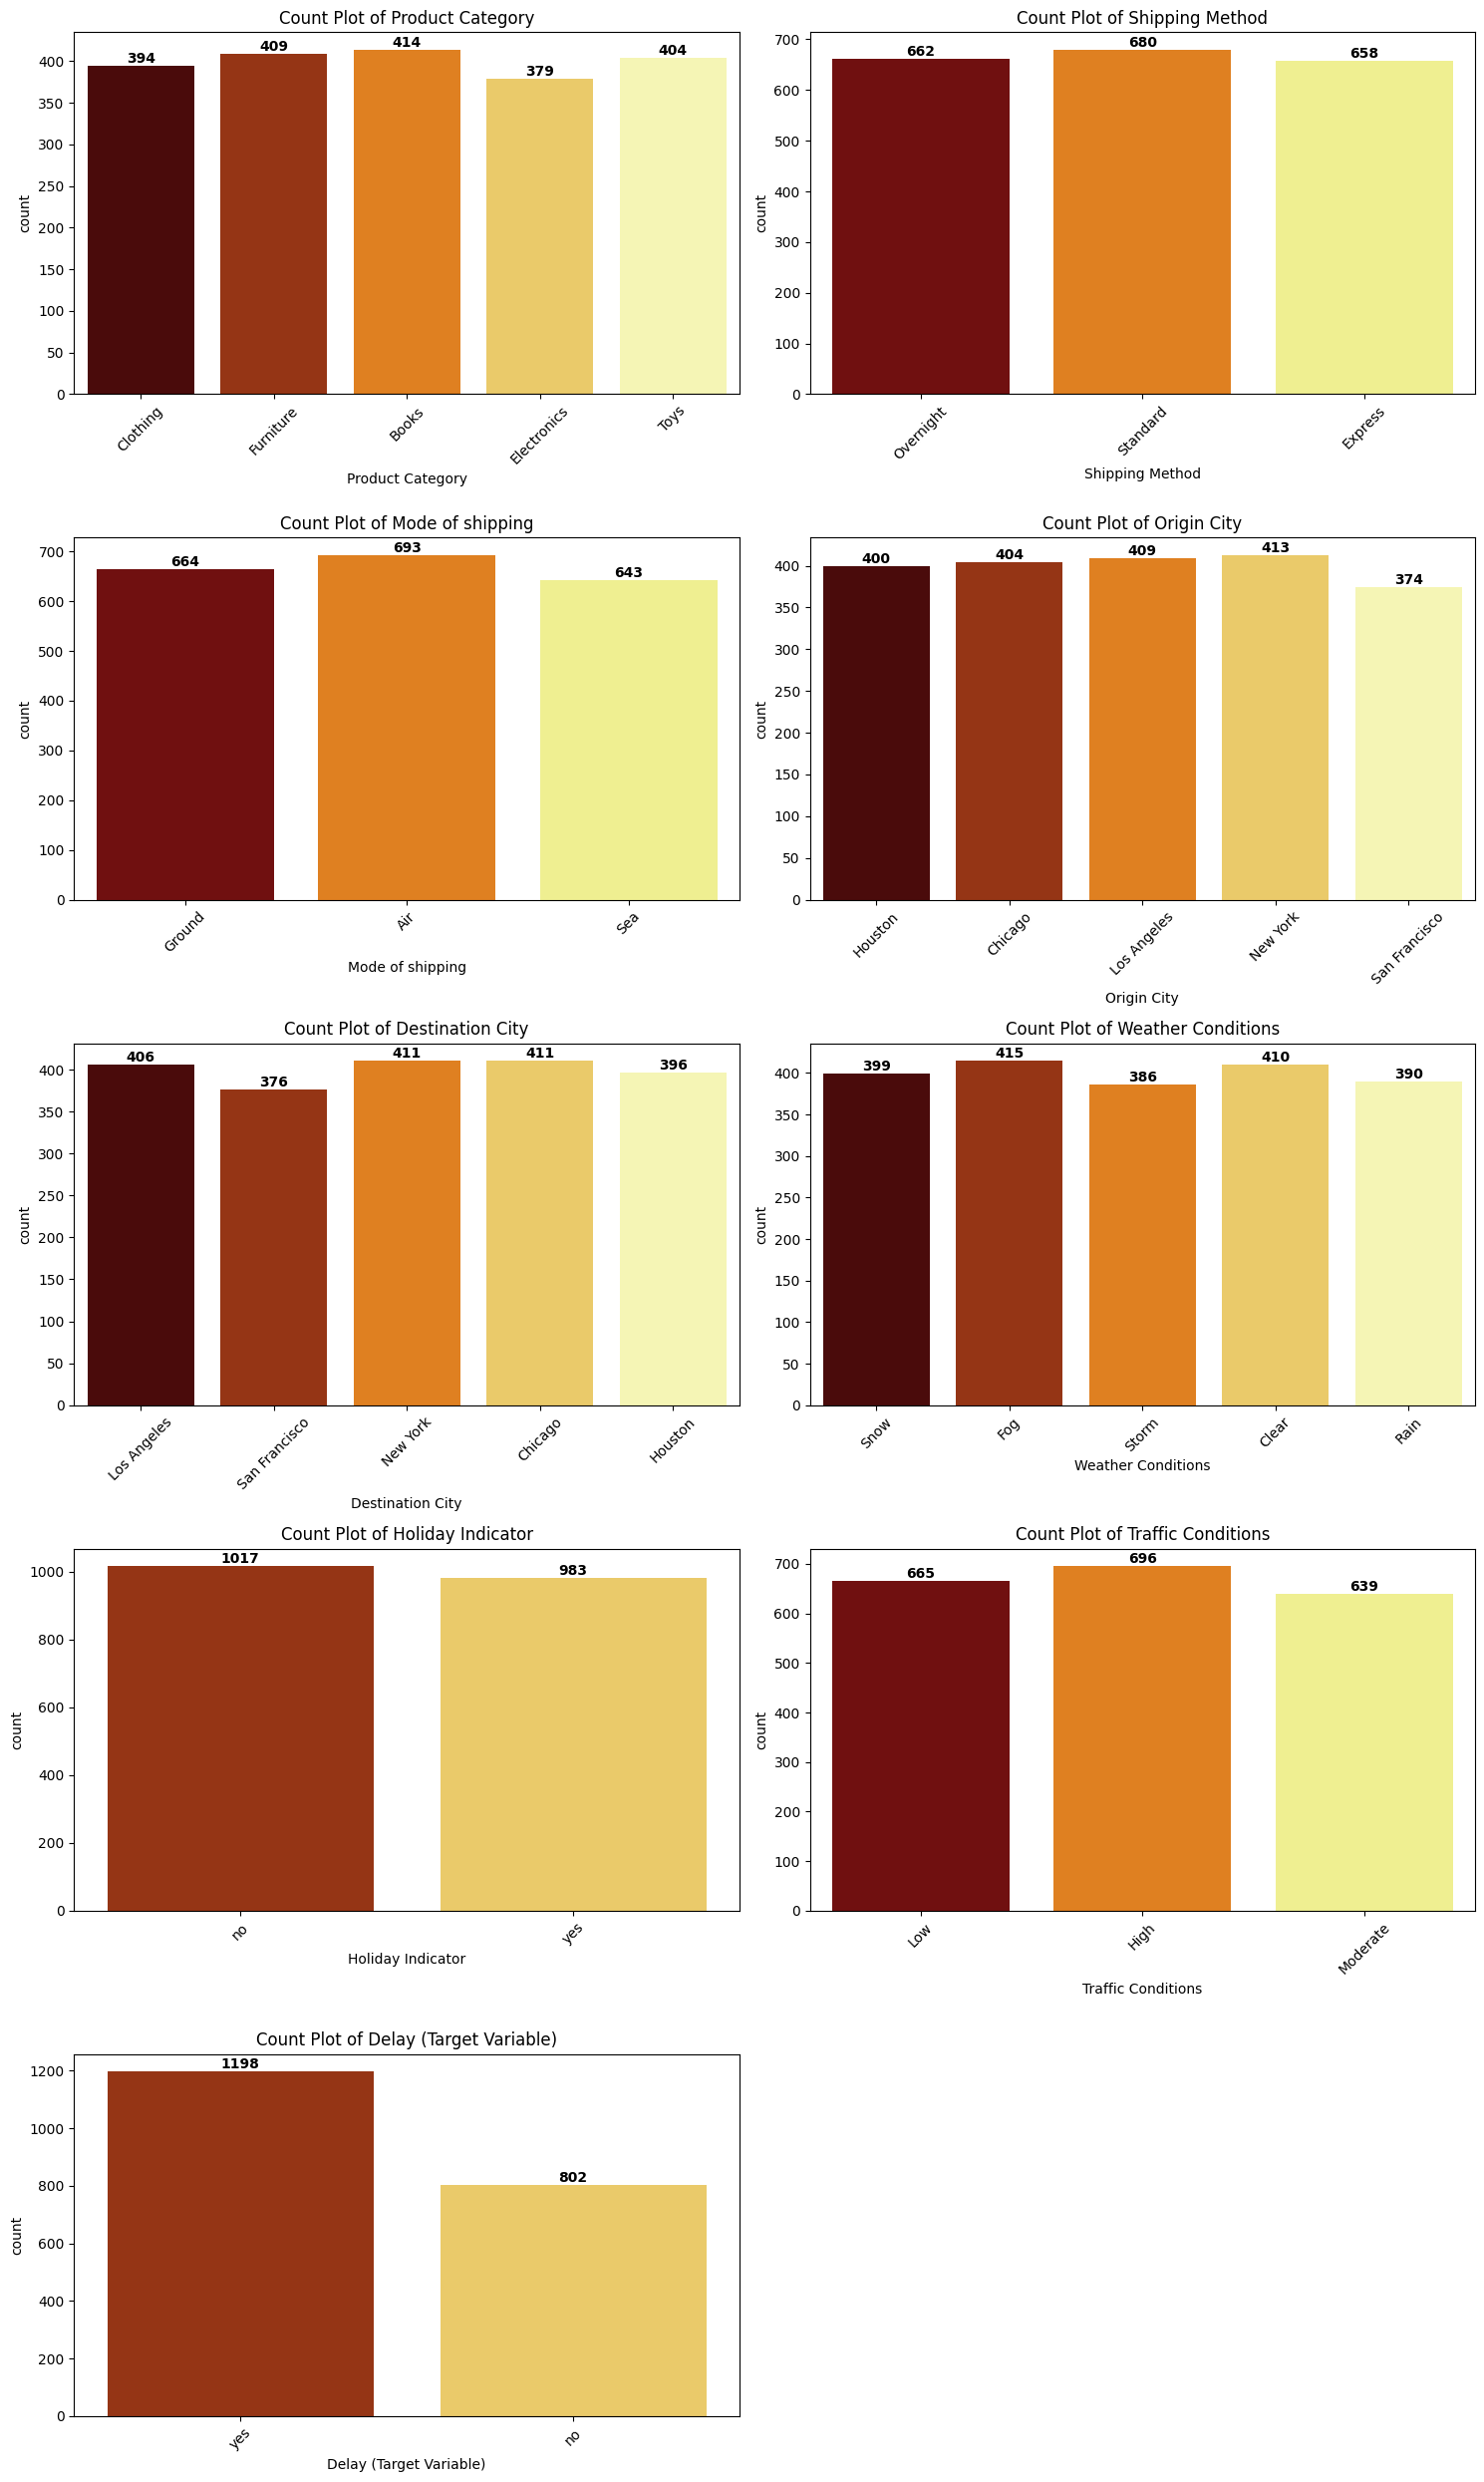

In [38]:
def plot_categorical_countplots(df, categorical_columns):
    num_cols = len(categorical_columns)
    rows = (num_cols // 2) + (num_cols % 2)  
    fig, axes = plt.subplots(rows, 2, figsize=(15, 5 * rows))  

    axes = axes.flatten()  
    for i, col in enumerate(categorical_columns):
        ax = axes[i]
        sns.countplot(x=df[col], data=df, palette="afmhot", ax=ax)
        ax.set_title(f"Count Plot of {col}")
        ax.tick_params(axis="x", rotation=45)  
        
        for p in ax.patches:
            ax.annotate(f"{int(p.get_height())}",  
                        (p.get_x() + p.get_width() / 2, p.get_height()),  
                        ha="center", va="bottom", fontsize=10, fontweight="bold", color="black")

    
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])  

    plt.tight_layout()
    plt.show()


plot_categorical_countplots(df, categorical_columns)


Pie charts visually represent the proportion of each category within a variable, making it easier to identify dominant categories and distribution imbalances.

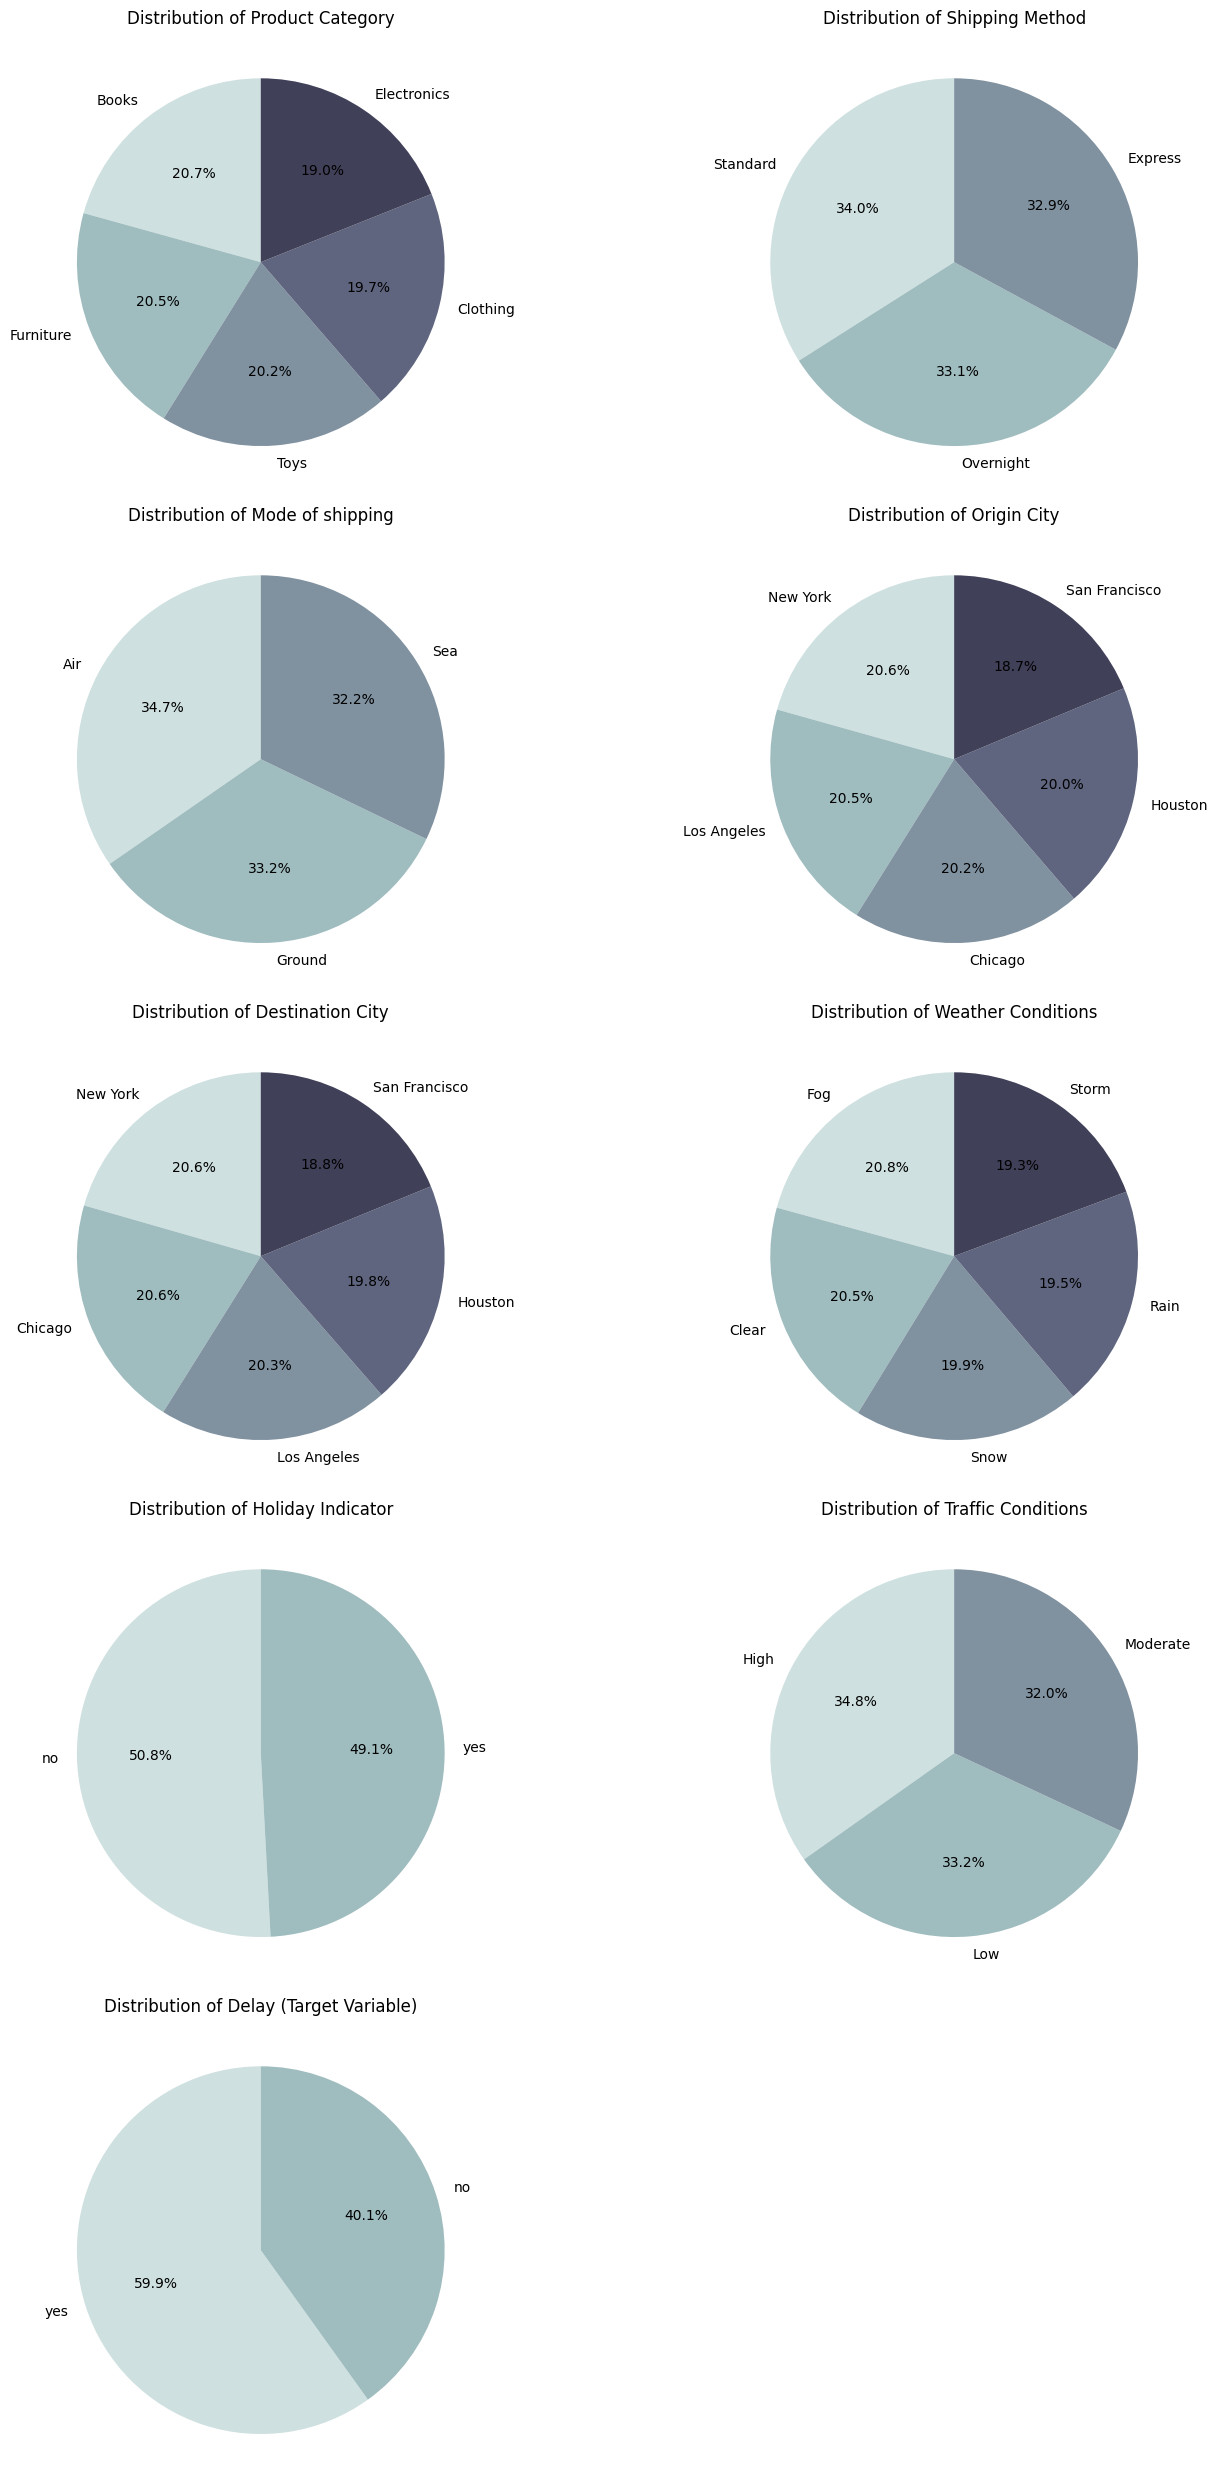

In [39]:
def plot_pie_charts(df, categorical_columns):
    num_cols = len(categorical_columns)
    rows = (num_cols // 2) + (num_cols % 2)  
    fig, axes = plt.subplots(rows, 2, figsize=(15, 5 * rows))  
    axes = axes.flatten() 
    
    for i, col in enumerate(categorical_columns):
        df[col].value_counts().plot.pie(
            autopct="%1.1f%%", ax=axes[i], colors=sns.color_palette("bone_r"), startangle=90)
        axes[i].set_title(f"Distribution of {col}")
        axes[i].set_ylabel("")  

    
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()


plot_pie_charts(df, categorical_columns)


BIVARIATE ANALYSIS

Stacked bar charts for each categorical column, compared against the "Delay (Target Variable)" column.

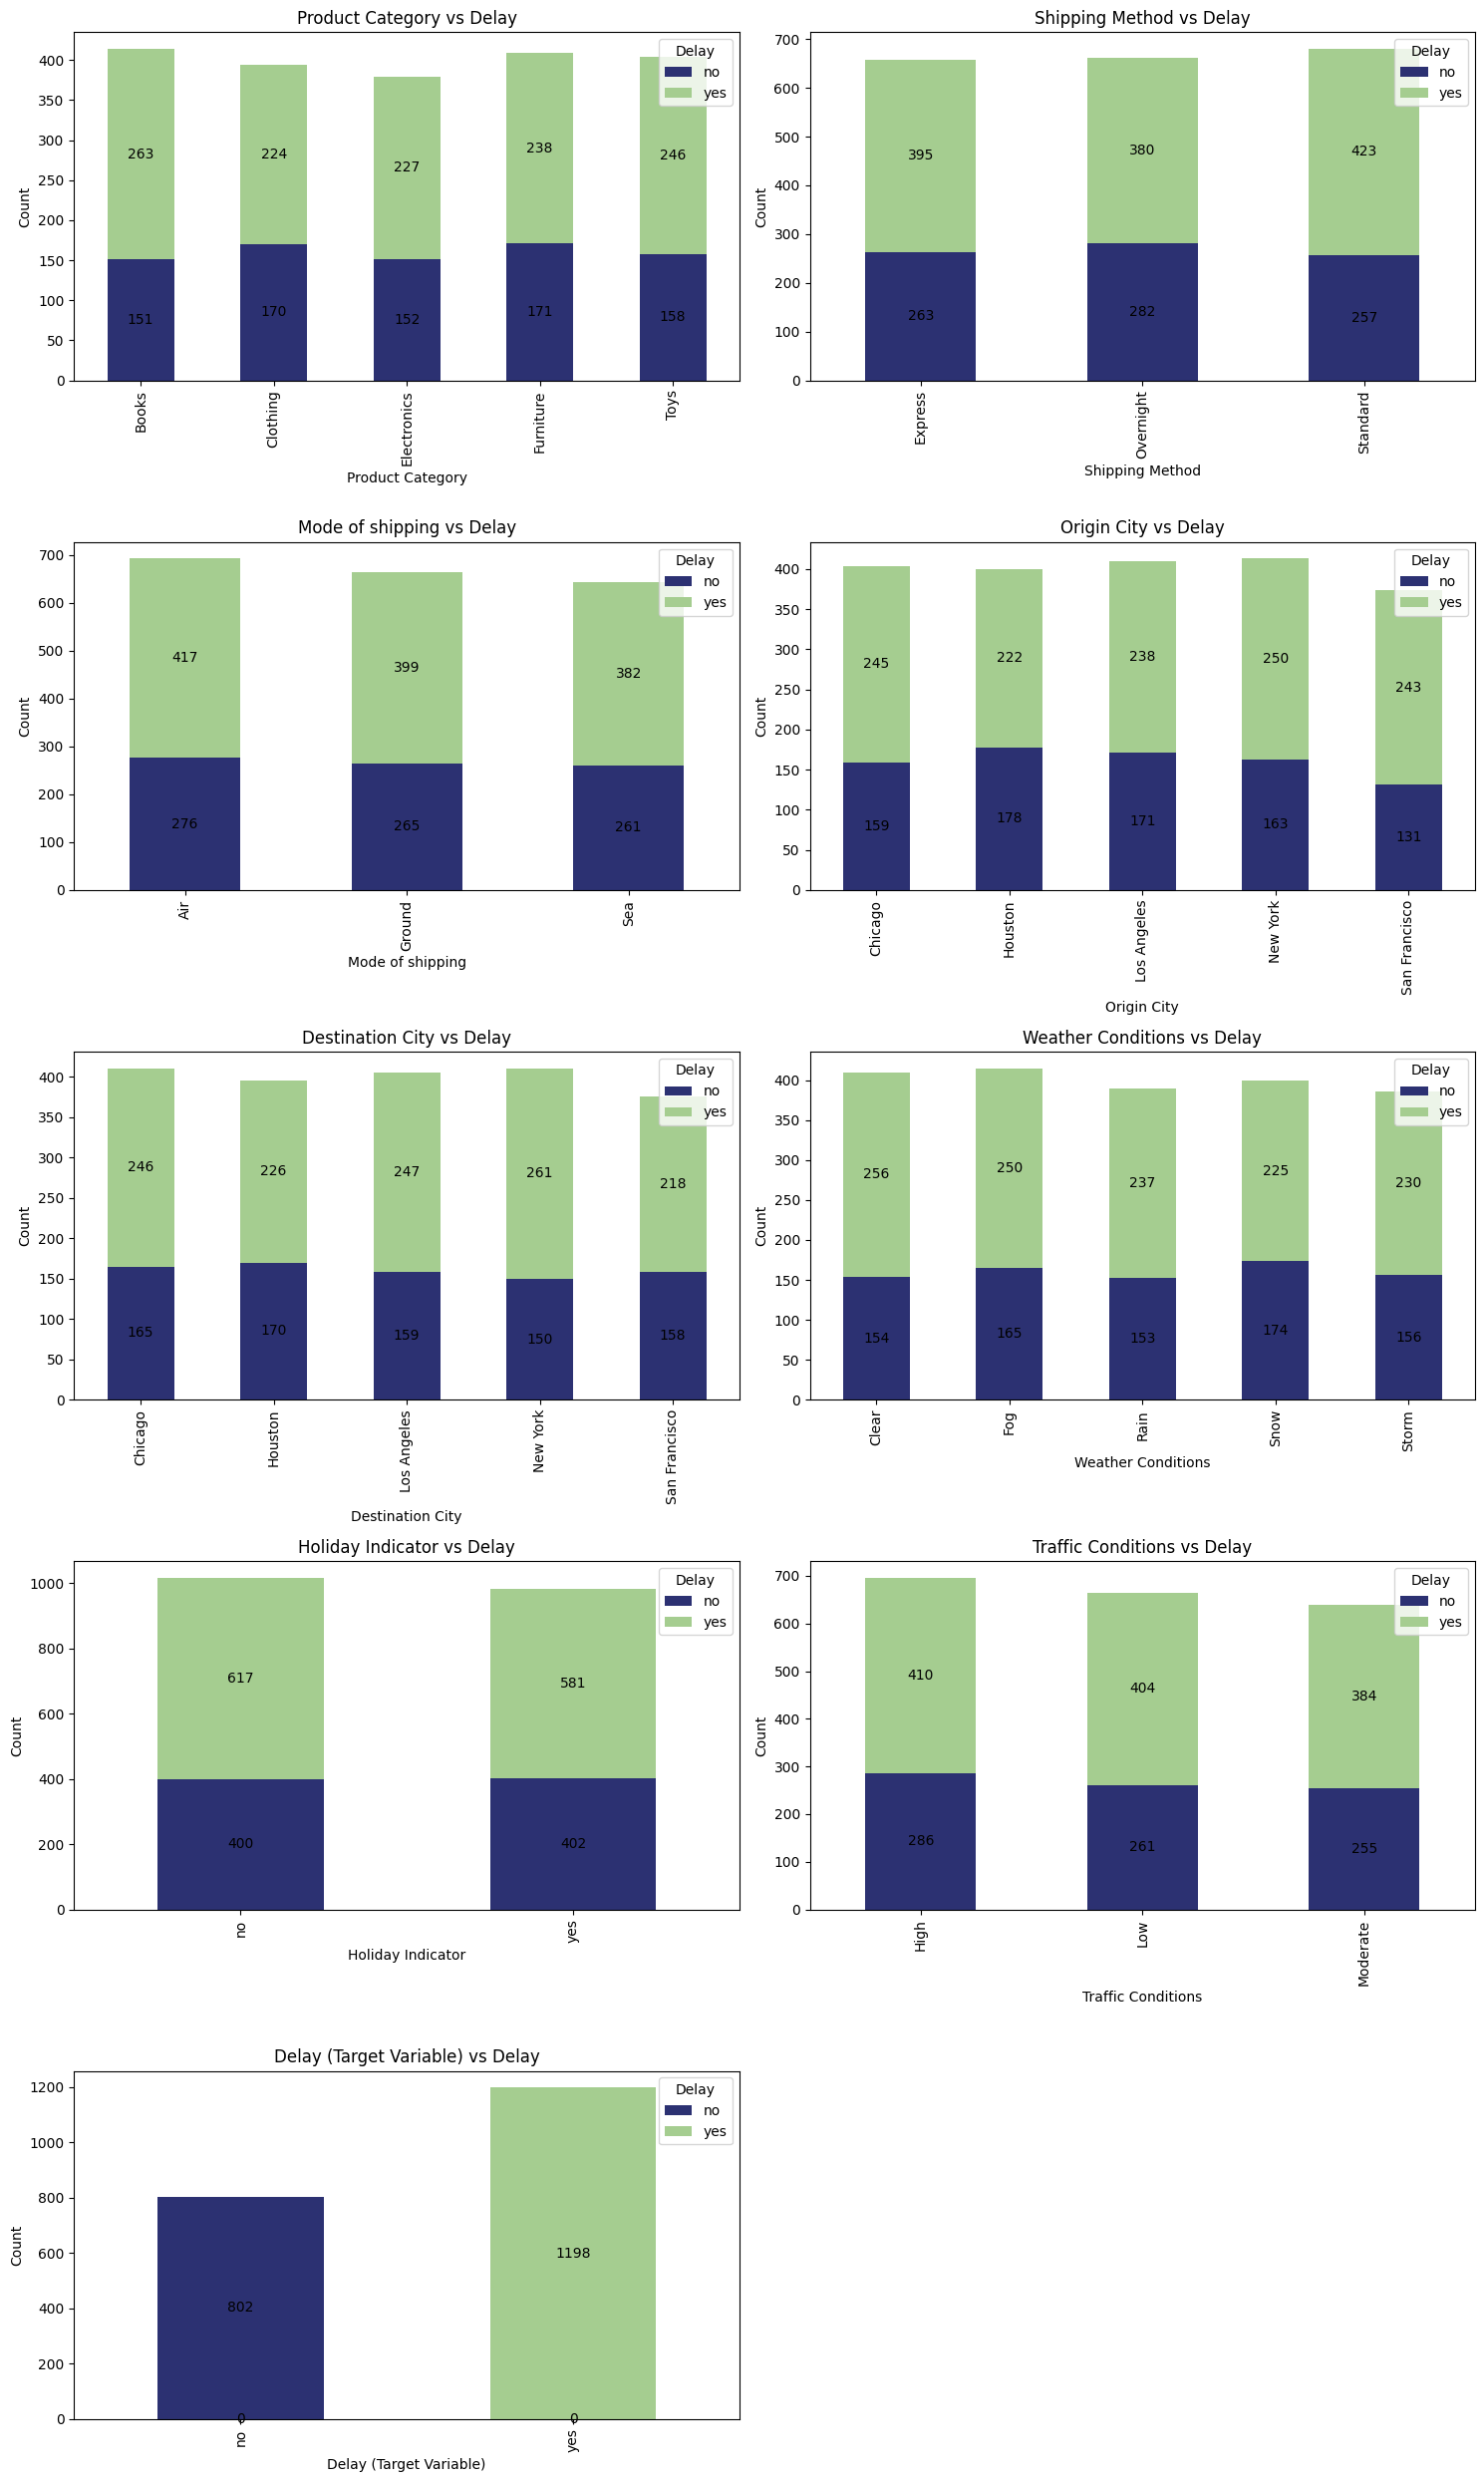

In [40]:

def plot_stacked_bar_with_labels(df, categorical_columns):
    num_cols = len(categorical_columns)
    rows = (num_cols // 2) + (num_cols % 2) 
    fig, axes = plt.subplots(rows, 2, figsize=(15, 5 * rows)) 
    axes = axes.flatten()

    for i, col in enumerate(categorical_columns):
        cross_tab = pd.crosstab(df[col], df["Delay (Target Variable)"])  
        ax = cross_tab.plot(kind="bar", stacked=True, ax=axes[i], colormap="crest_r")

       
        for container in ax.containers:
            ax.bar_label(container, fmt="%d", label_type="center", fontsize=10, color="black")

        axes[i].set_title(f"{col} vs Delay")
        axes[i].set_ylabel("Count")
        axes[i].legend(title="Delay", loc="upper right")

   
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()


plot_stacked_bar_with_labels(df, categorical_columns)



Create a grid of scatter plots and histograms of numerical features in DataFrame, with a focus on the relationship between  numerical features and the target variable, "Delay (Target Variable)".

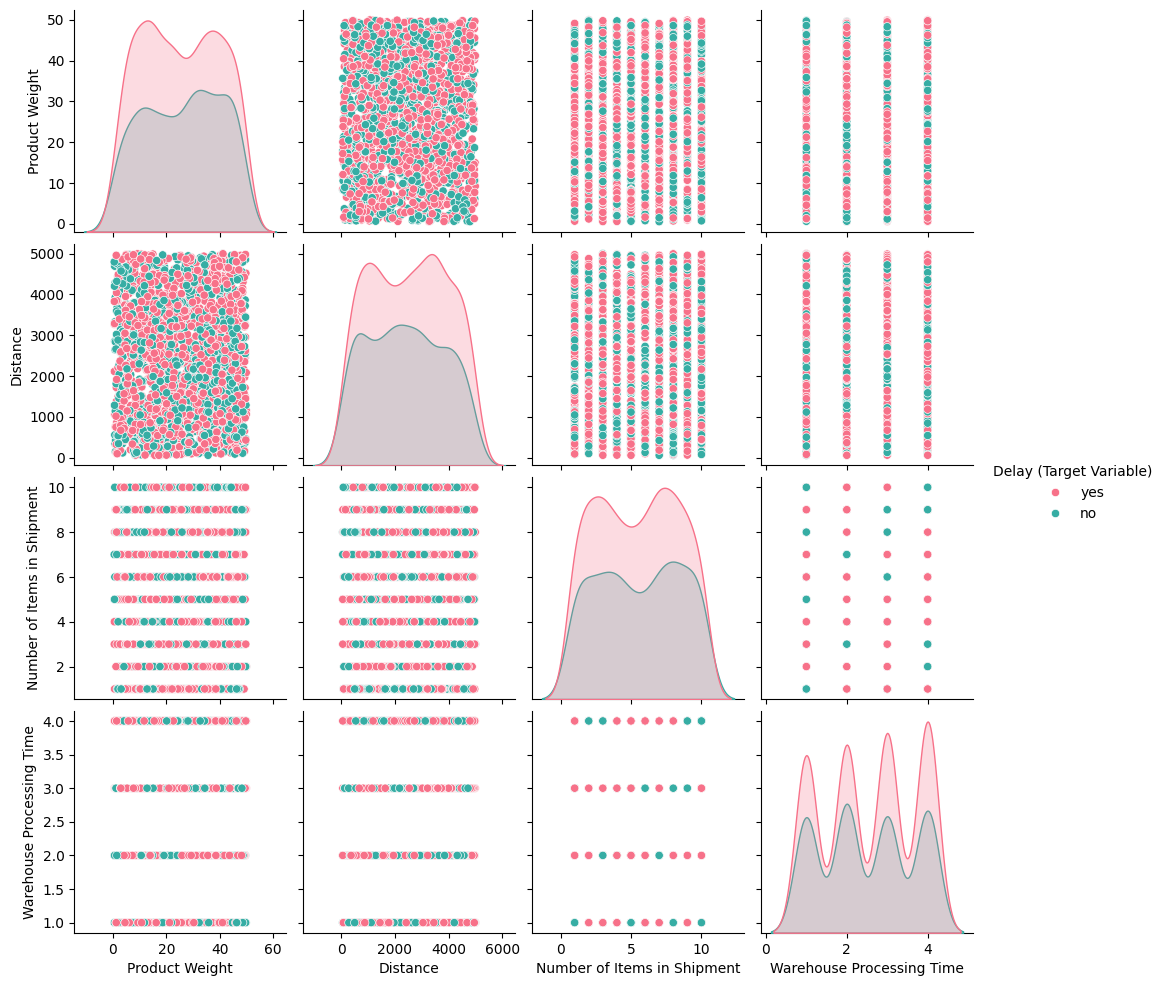

In [41]:
sns.pairplot(df, diag_kind="kde", hue="Delay (Target Variable)", palette="husl")
plt.show()


### CONVERTING DATA TO NUMERIC FORMAT

In [42]:
from sklearn.preprocessing import LabelEncoder


label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col]) 
    label_encoders[col] = le  


df.head()


,Product Category,Product Weight,Shipping Method,Distance,Number of Items in Shipment,Mode of shipping,Origin City,Destination City,Weather Conditions,Holiday Indicator,Warehouse Processing Time,Traffic Conditions,Delay (Target Variable)
0,1,21.10,1,2747,10,1,1,2,3,0,2,1,1
1,3,13.64,2,3810,8,0,0,4,1,0,3,0,1
2,3,17.35,0,1344,2,1,1,3,4,1,3,0,1
3,0,14.90,2,2504,7,1,2,0,3,1,2,0,1
4,3,21.70,0,3628,1,0,1,2,0,1,1,2,1


In [43]:
for col in categorical_columns:
    print(f"Column: {col}")
    print("Original Categories:", label_encoders[col].classes_) 
    print("Encoded Values:", list(range(len(label_encoders[col].classes_)))) 
    print("-" * 50)


Column: Product Category
Original Categories: ['Books' 'Clothing' 'Electronics' 'Furniture' 'Toys']
Encoded Values: [0, 1, 2, 3, 4]
--------------------------------------------------
Column: Shipping Method
Original Categories: ['Express' 'Overnight' 'Standard']
Encoded Values: [0, 1, 2]
--------------------------------------------------
Column: Mode of shipping
Original Categories: ['Air' 'Ground' 'Sea']
Encoded Values: [0, 1, 2]
--------------------------------------------------
Column: Origin City
Original Categories: ['Chicago' 'Houston' 'Los Angeles' 'New York' 'San Francisco']
Encoded Values: [0, 1, 2, 3, 4]
--------------------------------------------------
Column: Destination City
Original Categories: ['Chicago' 'Houston' 'Los Angeles' 'New York' 'San Francisco']
Encoded Values: [0, 1, 2, 3, 4]
--------------------------------------------------
Column: Weather Conditions
Original Categories: ['Clear' 'Fog' 'Rain' 'Snow' 'Storm']
Encoded Values: [0, 1, 2, 3, 4]
-----------------

# <I>TRAIN TEST SPLIT</I>

In [44]:
x=df.drop("Delay (Target Variable)",axis=1)
x

,Product Category,Product Weight,Shipping Method,Distance,Number of Items in Shipment,Mode of shipping,Origin City,Destination City,Weather Conditions,Holiday Indicator,Warehouse Processing Time,Traffic Conditions
0,1,21.10,1,2747,10,1,1,2,3,0,2,1
1,3,13.64,2,3810,8,0,0,4,1,0,3,0
2,3,17.35,0,1344,2,1,1,3,4,1,3,0
3,0,14.90,2,2504,7,1,2,0,3,1,2,0
4,3,21.70,0,3628,1,0,1,2,0,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,4,30.31,0,1445,4,0,4,1,2,0,1,2
1996,0,1.26,1,4959,9,0,2,1,0,0,1,0
1997,3,5.79,0,1975,5,0,1,3,1,1,4,2
1998,2,48.19,0,2721,4,0,0,1,2,0,2,2


In [45]:
y=df["Delay (Target Variable)"]
y

0       1
1       1
2       1
3       1
4       1
       ..
1995    1
1996    1
1997    1
1998    1
1999    1
Name: Delay (Target Variable), Length: 2000, dtype: int64

In [46]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=20)

In [47]:
x_train.shape

(1500, 12)

In [48]:
y_train.shape

(1500,)

In [49]:
x_test.shape

(500, 12)

In [50]:
y_test.shape

(500,)

# <I> MODEL TRAINING</I>

#### Algorithm1 -Logistic Regression

In [51]:
log_reg=LogisticRegression()
log_reg

LogisticRegression()

In [52]:
log_reg_model=log_reg.fit(x_train,y_train)
log_reg_model

LogisticRegression()

Training Data

In [53]:
y_train_pred=log_reg_model.predict(x_train)

Model Evaluation  for logistic regression on Training Data

In [54]:
print("#####Model Evaluation for Training data#####")
ac=accuracy_score(y_train,y_train_pred)
print("Accuary Score",ac)
print("-"*50)

con_mat=confusion_matrix(y_train,y_train_pred)
print("Confusion Matrix\n",con_mat)
print("-"*50)

cr=classification_report(y_train,y_train_pred)
print("Classification Report\n",cr)
print("-"*50)

#####Model Evaluation for Training data#####
Accuary Score 0.5993333333333334
--------------------------------------------------
Confusion Matrix
 [[ 14 593]
 [  8 885]]
--------------------------------------------------
Classification Report
               precision    recall  f1-score   support

           0       0.64      0.02      0.04       607
           1       0.60      0.99      0.75       893

    accuracy                           0.60      1500
   macro avg       0.62      0.51      0.40      1500
weighted avg       0.61      0.60      0.46      1500

--------------------------------------------------


Testing Data

In [55]:
y_test_pred=log_reg_model.predict(x_test)

Model Evaluation for logistic regression on Testing Data

In [56]:
print("#### Model Evaluation for testing data #####")
ac=accuracy_score(y_test,y_test_pred)
print("Accuracy Score",ac)
print("-"*60)

con_mat=confusion_matrix(y_test,y_test_pred)
print("Confusion Marix\n",con_mat)
print("-"*60)

cr=classification_report(y_test,y_test_pred)
print("Classification Report\n",cr)
print("-"*60)

#### Model Evaluation for testing data #####
Accuracy Score 0.6
------------------------------------------------------------
Confusion Marix
 [[  2 193]
 [  7 298]]
------------------------------------------------------------
Classification Report
               precision    recall  f1-score   support

           0       0.22      0.01      0.02       195
           1       0.61      0.98      0.75       305

    accuracy                           0.60       500
   macro avg       0.41      0.49      0.38       500
weighted avg       0.46      0.60      0.46       500

------------------------------------------------------------


### Alogrithm2 -Decision Tree

In [57]:
dt_clf=DecisionTreeClassifier()
dt_clf

DecisionTreeClassifier()

In [58]:
dt_clf_model=dt_clf.fit(x_train,y_train)
dt_clf_model

DecisionTreeClassifier()

Training Data

In [59]:
y_train_pred=dt_clf_model.predict(x_train)
y_train_pred

array([1, 0, 1, ..., 1, 0, 0], shape=(1500,))

Model Evaluation for decision tree classifier on Training Data

In [60]:
print("#####Model Evaluation for Training data#####")
ac=accuracy_score(y_train,y_train_pred)
print("Accuary Score",ac)
print("-"*50)

con_mat=confusion_matrix(y_train,y_train_pred)
print("Confusion Matrix\n",con_mat)
print("-"*50)

cr=classification_report(y_train,y_train_pred)
print("Classification Report\n",cr)
print("-"*50)

#####Model Evaluation for Training data#####
Accuary Score 1.0
--------------------------------------------------
Confusion Matrix
 [[607   0]
 [  0 893]]
--------------------------------------------------
Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       607
           1       1.00      1.00      1.00       893

    accuracy                           1.00      1500
   macro avg       1.00      1.00      1.00      1500
weighted avg       1.00      1.00      1.00      1500

--------------------------------------------------


Testing data

In [61]:
y_test_pred=dt_clf_model.predict(x_test)

Model Evaluation for decision tree classifier on Testing Data

In [62]:
print("#### Model Evaluation for testing data #####")
ac=accuracy_score(y_test,y_test_pred)
print("Accuracy Score",ac)
print("-"*60)

con_mat=confusion_matrix(y_test,y_test_pred)
print("Confusion Marix\n",con_mat)
print("-"*60)

cr=classification_report(y_test,y_test_pred)
print("Classification Report\n",cr)
print("-"*60)

#### Model Evaluation for testing data #####
Accuracy Score 0.534
------------------------------------------------------------
Confusion Marix
 [[ 86 109]
 [124 181]]
------------------------------------------------------------
Classification Report
               precision    recall  f1-score   support

           0       0.41      0.44      0.42       195
           1       0.62      0.59      0.61       305

    accuracy                           0.53       500
   macro avg       0.52      0.52      0.52       500
weighted avg       0.54      0.53      0.54       500

------------------------------------------------------------


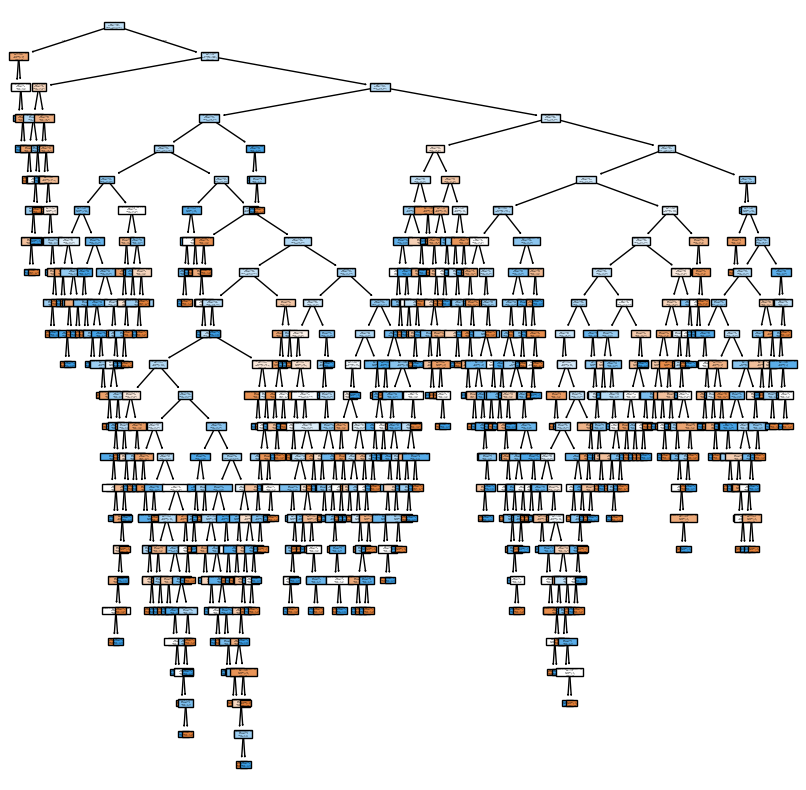

In [63]:
plt.figure(figsize=(10,10))
plot_tree(dt_clf_model,feature_names=df.columns,class_names=["Yes","No"],filled=True)
plt.show()

### Algorithm3-Decision Tree HyperParameter Tunning

In [64]:
hyperparameters = {"criterion":["gini","entropy","log_loss"],
                  "max_depth":np.arange(5,12),
                  "min_samples_split" : np.arange(2,11),
                  "min_samples_leaf" : np.arange(2,11)}
hyperparameters

{'criterion': ['gini', 'entropy', 'log_loss'],
 'max_depth': array([ 5,  6,  7,  8,  9, 10, 11]),
 'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
 'min_samples_leaf': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10])}

In [65]:
rscv=RandomizedSearchCV(dt_clf_model,hyperparameters,cv=5)
rscv_model=rscv.fit(x_train,y_train)
rscv_model.best_estimator_

DecisionTreeClassifier(criterion='log_loss', max_depth=np.int64(7),
                       min_samples_leaf=np.int64(6),
                       min_samples_split=np.int64(7))

In [66]:
dt_clf=DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=10,
                       min_samples_split=8)
dt_clf_rscv_model=dt_clf.fit(x_train,y_train)
dt_clf_rscv_model

DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=10,
                       min_samples_split=8)

Trainig Data

In [67]:
y_train_pred=dt_clf_rscv_model.predict(x_train)

Model Evaluation for decision tree hyperparameter tunning on Training Data

In [68]:
print("#####Model Evaluation for Training data#####")
ac=accuracy_score(y_train,y_train_pred)
print("Accuary Score",ac)
print("-"*50)

con_mat=confusion_matrix(y_train,y_train_pred)
print("Confusion Matrix\n",con_mat)
print("-"*50)

cr=classification_report(y_train,y_train_pred)
print("Classification Report\n",cr)
print("-"*50)

#####Model Evaluation for Training data#####
Accuary Score 0.6326666666666667
--------------------------------------------------
Confusion Matrix
 [[102 505]
 [ 46 847]]
--------------------------------------------------
Classification Report
               precision    recall  f1-score   support

           0       0.69      0.17      0.27       607
           1       0.63      0.95      0.75       893

    accuracy                           0.63      1500
   macro avg       0.66      0.56      0.51      1500
weighted avg       0.65      0.63      0.56      1500

--------------------------------------------------


Testing Data

In [69]:
y_test_pred=dt_clf_rscv_model.predict(x_test)

Model Evaluation for decision tree hyperparameter tunning on Testing Data

In [70]:
print("#### Model Evaluation for testing data #####")
ac=accuracy_score(y_test,y_test_pred)
print("Accuracy Score",ac)
print("-"*60)

con_mat=confusion_matrix(y_test,y_test_pred)
print("Confusion Marix\n",con_mat)
print("-"*60)

cr=classification_report(y_test,y_test_pred)
print("Classification Report\n",cr)
print("-"*60)

#### Model Evaluation for testing data #####
Accuracy Score 0.578
------------------------------------------------------------
Confusion Marix
 [[ 21 174]
 [ 37 268]]
------------------------------------------------------------
Classification Report
               precision    recall  f1-score   support

           0       0.36      0.11      0.17       195
           1       0.61      0.88      0.72       305

    accuracy                           0.58       500
   macro avg       0.48      0.49      0.44       500
weighted avg       0.51      0.58      0.50       500

------------------------------------------------------------


### Algorithm4-Random Forest 

In [71]:
rfc=RandomForestClassifier()
rfc

RandomForestClassifier()

In [72]:
rfc_model=rfc.fit(x_train,y_train)
rfc_model

RandomForestClassifier()

Training data

In [73]:
y_train_pred=rfc_model.predict(x_train)
y_train_pred

array([1, 0, 1, ..., 1, 0, 0], shape=(1500,))

Model Evaluation with Random Forest Classifier for Training Data

In [74]:
print("----Model Evaluation for Training data----")
ac=accuracy_score(y_train,y_train_pred)
print("Accuracy Score",ac)
print("-"*50)

con_mat=confusion_matrix(y_train,y_train_pred)
print("Confusion matrix\n",con_mat)
print("-"*50)

cr=classification_report(y_train,y_train_pred)
print("Classification Report\n",cr)
print("-"*50)


----Model Evaluation for Training data----
Accuracy Score 1.0
--------------------------------------------------
Confusion matrix
 [[607   0]
 [  0 893]]
--------------------------------------------------
Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       607
           1       1.00      1.00      1.00       893

    accuracy                           1.00      1500
   macro avg       1.00      1.00      1.00      1500
weighted avg       1.00      1.00      1.00      1500

--------------------------------------------------


Testing Data

In [75]:
y_test_pred=rfc_model.predict(x_test)
y_test_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,

Model Evaluation with Random Forest Classifier for Testing Data

In [76]:
print("-------Model Evaluation for Testing data-----")
ac=accuracy_score(y_test,y_test_pred)
print("Accuracy Score:",ac)
print("-"*50)

con_mat=confusion_matrix(y_test,y_test_pred)
print("Confusion Matrix\n",con_mat)
print("-"*50)

cr=classification_report(y_test,y_test_pred)
print("Classification Report\n",cr)
print("-"*50)

-------Model Evaluation for Testing data-----
Accuracy Score: 0.57
--------------------------------------------------
Confusion Matrix
 [[ 38 157]
 [ 58 247]]
--------------------------------------------------
Classification Report
               precision    recall  f1-score   support

           0       0.40      0.19      0.26       195
           1       0.61      0.81      0.70       305

    accuracy                           0.57       500
   macro avg       0.50      0.50      0.48       500
weighted avg       0.53      0.57      0.53       500

--------------------------------------------------


### Algorithm5-Random Forest Classifier Hyper parameter turnning

In [77]:
hyperparameters = {"criterion":["gini","entropy","log_loss"],
                  "max_depth":np.arange(5,12),
                  "min_samples_split" : np.arange(2,11),
                  "min_samples_leaf" : np.arange(2,11),
                  "n_estimators":np.arange(1,101)}
hyperparameters

{'criterion': ['gini', 'entropy', 'log_loss'],
 'max_depth': array([ 5,  6,  7,  8,  9, 10, 11]),
 'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
 'min_samples_leaf': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
 'n_estimators': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
         27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
         40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
         53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
         66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
         79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
         92,  93,  94,  95,  96,  97,  98,  99, 100])}

In [78]:
rscv=RandomizedSearchCV(rfc_model,hyperparameters,cv=5)
rscv_model=rscv.fit(x_train,y_train)
rscv_model.best_estimator_

RandomForestClassifier(max_depth=np.int64(5), min_samples_leaf=np.int64(10),
                       min_samples_split=np.int64(9),
                       n_estimators=np.int64(39))

In [79]:
rfc=RandomForestClassifier(criterion='entropy', max_depth=5, min_samples_leaf=2,
                       min_samples_split=7, n_estimators=66)

In [80]:
rfc_rscv_model=rfc.fit(x_train,y_train)
rfc_rscv_model

RandomForestClassifier(criterion='entropy', max_depth=5, min_samples_leaf=2,
                       min_samples_split=7, n_estimators=66)

Training Data

In [81]:
y_train_pred=rfc_rscv_model.predict(x_train)
y_train_pred

array([1, 1, 1, ..., 1, 0, 1], shape=(1500,))

Model Evaluation with Random Forest Hyperparameter Tunning for Training Data

In [82]:
print("----Model Evaluation for Training----")
ac=accuracy_score(y_train,y_train_pred)
print("Accuaracy Score",ac)
print("-"*50)

con_mat=confusion_matrix(y_train,y_train_pred)
print("Confusion Matrix\n",con_mat)
print("-"*50)

cr=classification_report(y_train,y_train_pred)
print("Classification Report\n",cr)
print("-"*50)

----Model Evaluation for Training----
Accuaracy Score 0.6353333333333333
--------------------------------------------------
Confusion Matrix
 [[ 60 547]
 [  0 893]]
--------------------------------------------------
Classification Report
               precision    recall  f1-score   support

           0       1.00      0.10      0.18       607
           1       0.62      1.00      0.77       893

    accuracy                           0.64      1500
   macro avg       0.81      0.55      0.47      1500
weighted avg       0.77      0.64      0.53      1500

--------------------------------------------------


Testing Data

In [83]:
y_test_pred=rfc_rscv_model.predict(x_test)
y_test_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

Model Evaluation with Random Forest Hyperparameter Tunning for Testing Data

In [84]:
print("----Model Evaluation for testing----")
ac=accuracy_score(y_test,y_test_pred)
print("Accuaracy Score",ac)
print("-"*50)

con_mat=confusion_matrix(y_test,y_test_pred)
print("Confusion Matrix\n",con_mat)
print("-"*50)

cr=classification_report(y_test,y_test_pred)
print("Classification Report\n",cr)
print("-"*50)

----Model Evaluation for testing----
Accuaracy Score 0.608
--------------------------------------------------
Confusion Matrix
 [[  6 189]
 [  7 298]]
--------------------------------------------------
Classification Report
               precision    recall  f1-score   support

           0       0.46      0.03      0.06       195
           1       0.61      0.98      0.75       305

    accuracy                           0.61       500
   macro avg       0.54      0.50      0.41       500
weighted avg       0.55      0.61      0.48       500

--------------------------------------------------


### Algorithm 6 AdaBoost

In [85]:
abc=AdaBoostClassifier()
abc_model=abc.fit(x_train,y_train)

Training data

In [86]:
y_train_pred=abc_model.predict(x_train)

Model Evaluation with  AdaBoost for Training Data

In [87]:
print("----Model Evaluation for Training----")
ac=accuracy_score(y_train,y_train_pred)
print("Accuaracy Score",ac)
print("-"*50)

con_mat=confusion_matrix(y_train,y_train_pred)
print("Confusion Matrix\n",con_mat)
print("-"*50)

cr=classification_report(y_train,y_train_pred)
print("Classification Report\n",cr)
print("-"*50)

----Model Evaluation for Training----
Accuaracy Score 0.608
--------------------------------------------------
Confusion Matrix
 [[ 33 574]
 [ 14 879]]
--------------------------------------------------
Classification Report
               precision    recall  f1-score   support

           0       0.70      0.05      0.10       607
           1       0.60      0.98      0.75       893

    accuracy                           0.61      1500
   macro avg       0.65      0.52      0.43      1500
weighted avg       0.64      0.61      0.49      1500

--------------------------------------------------


Testing Data

In [88]:
y_test_pred=abc_model.predict(x_test)

Model Evaluation with Adaboost for Testing Data

In [89]:
print("----Model Evaluation for testing----")
ac=accuracy_score(y_test,y_test_pred)
print("Accuaracy Score",ac)
print("-"*50)

con_mat=confusion_matrix(y_test,y_test_pred)
print("Confusion Matrix\n",con_mat)
print("-"*50)

cr=classification_report(y_test,y_test_pred)
print("Classification Report\n",cr)
print("-"*50)

----Model Evaluation for testing----
Accuaracy Score 0.606
--------------------------------------------------
Confusion Matrix
 [[  9 186]
 [ 11 294]]
--------------------------------------------------
Classification Report
               precision    recall  f1-score   support

           0       0.45      0.05      0.08       195
           1       0.61      0.96      0.75       305

    accuracy                           0.61       500
   macro avg       0.53      0.51      0.42       500
weighted avg       0.55      0.61      0.49       500

--------------------------------------------------


### Algorithm 7 AdaBoost with Hyper parameter

In [90]:
hyperparameters={"n_estimators":np.arange(1,51),
                 "learning_rate":[0,0.1,0.001,0.1,1]}

hyperparameters

{'n_estimators': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),
 'learning_rate': [0, 0.1, 0.001, 0.1, 1]}

In [91]:
rscv=RandomizedSearchCV(abc_model,hyperparameters,cv=5)
rscv=rscv.fit(x_train,y_train)
rscv.best_estimator_

AdaBoostClassifier(learning_rate=0.1, n_estimators=np.int64(44))

In [92]:
abc_rscv=AdaBoostClassifier(learning_rate=0.1, n_estimators=14)
abc_rscv_model=abc_rscv.fit(x_train,y_train)

Training Data

In [93]:
y_train_pred=abc_rscv_model.predict(x_train)

Model Evaluation with AdaBoost Hyperparameter Tunning for Training Data

In [94]:
print("----Model Evaluation for Training----")
ac=accuracy_score(y_train,y_train_pred)
print("Accuaracy Score",ac)
print("-"*50)

con_mat=confusion_matrix(y_train,y_train_pred)
print("Confusion Matrix\n",con_mat)
print("-"*50)

cr=classification_report(y_train,y_train_pred)
print("Classification Report\n",cr)
print("-"*50)

----Model Evaluation for Training----
Accuaracy Score 0.602
--------------------------------------------------
Confusion Matrix
 [[ 14 593]
 [  4 889]]
--------------------------------------------------
Classification Report
               precision    recall  f1-score   support

           0       0.78      0.02      0.04       607
           1       0.60      1.00      0.75       893

    accuracy                           0.60      1500
   macro avg       0.69      0.51      0.40      1500
weighted avg       0.67      0.60      0.46      1500

--------------------------------------------------


Testing Data

In [95]:
y_test_pred=abc_rscv_model.predict(x_test)

Model Evaluation with AdaBoost Hyperparameter Tunning for Testing Data

In [96]:
print("----Model Evaluation for testing----")
ac=accuracy_score(y_test,y_test_pred)
print("Accuaracy Score",ac)
print("-"*50)

con_mat=confusion_matrix(y_test,y_test_pred)
print("Confusion Matrix\n",con_mat)
print("-"*50)

cr=classification_report(y_test,y_test_pred)
print("Classification Report\n",cr)
print("-"*50)

----Model Evaluation for testing----
Accuaracy Score 0.612
--------------------------------------------------
Confusion Matrix
 [[  3 192]
 [  2 303]]
--------------------------------------------------
Classification Report
               precision    recall  f1-score   support

           0       0.60      0.02      0.03       195
           1       0.61      0.99      0.76       305

    accuracy                           0.61       500
   macro avg       0.61      0.50      0.39       500
weighted avg       0.61      0.61      0.47       500

--------------------------------------------------


### Alogorithm 8 Gradient Boosting

In [97]:
gbc=GradientBoostingClassifier()
gbc_model=gbc.fit(x_train,y_train)

Training Data

In [98]:
y_train_pred=gbc_model.predict(x_train)

Model Evaluation with Gradient Boosting for Training Data

In [99]:
print("----Model Evaluation for Training----")
ac=accuracy_score(y_train,y_train_pred)
print("Accuaracy Score",ac)
print("-"*50)

con_mat=confusion_matrix(y_train,y_train_pred)
print("Confusion Matrix\n",con_mat)
print("-"*50)

cr=classification_report(y_train,y_train_pred)
print("Classification Report\n",cr)
print("-"*50)

----Model Evaluation for Training----
Accuaracy Score 0.7206666666666667
--------------------------------------------------
Confusion Matrix
 [[213 394]
 [ 25 868]]
--------------------------------------------------
Classification Report
               precision    recall  f1-score   support

           0       0.89      0.35      0.50       607
           1       0.69      0.97      0.81       893

    accuracy                           0.72      1500
   macro avg       0.79      0.66      0.65      1500
weighted avg       0.77      0.72      0.68      1500

--------------------------------------------------


Testing Data

In [100]:
y_test_pred=gbc_model.predict(x_test)

Model Evaluation with Gradient Boosting for Testing Data

In [101]:
print("----Model Evaluation for testing----")
ac=accuracy_score(y_test,y_test_pred)
print("Accuaracy Score",ac)
print("-"*50)

con_mat=confusion_matrix(y_test,y_test_pred)
print("Confusion Matrix\n",con_mat)
print("-"*50)

cr=classification_report(y_test,y_test_pred)
print("Classification Report\n",cr)
print("-"*50)

----Model Evaluation for testing----
Accuaracy Score 0.576
--------------------------------------------------
Confusion Matrix
 [[ 27 168]
 [ 44 261]]
--------------------------------------------------
Classification Report
               precision    recall  f1-score   support

           0       0.38      0.14      0.20       195
           1       0.61      0.86      0.71       305

    accuracy                           0.58       500
   macro avg       0.49      0.50      0.46       500
weighted avg       0.52      0.58      0.51       500

--------------------------------------------------


### Algorithm 9 Gradient Boosting with HyperParameter Tunning

In [102]:
hyperparameters={"learning_rate":[0,0.1,0.001,0.1,1],
                 "n_estimators":np.arange(1,51)}
hyperparameters

{'learning_rate': [0, 0.1, 0.001, 0.1, 1],
 'n_estimators': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])}

In [103]:
rscv=RandomizedSearchCV(gbc_model,hyperparameters,cv=5)
rscv=rscv.fit(x_train,y_train)
rscv.best_estimator_

GradientBoostingClassifier(n_estimators=np.int64(7))

In [104]:
gbc_rscv=GradientBoostingClassifier(n_estimators=15)
gbc_rscv_model=gbc_rscv.fit(x_train,y_train)

Training Data

In [105]:
y_train_pred=gbc_rscv_model.predict(x_train)

Model Evaluation with Gradient Boosting Hyperparameter Tunning for Training Data

In [106]:
print("----Model Evaluation for Training----")
ac=accuracy_score(y_train,y_train_pred)
print("Accuaracy Score",ac)
print("-"*50)

con_mat=confusion_matrix(y_train,y_train_pred)
print("Confusion Matrix\n",con_mat)
print("-"*50)

cr=classification_report(y_train,y_train_pred)
print("Classification Report\n",cr)
print("-"*50)

----Model Evaluation for Training----
Accuaracy Score 0.6226666666666667
--------------------------------------------------
Confusion Matrix
 [[ 51 556]
 [ 10 883]]
--------------------------------------------------
Classification Report
               precision    recall  f1-score   support

           0       0.84      0.08      0.15       607
           1       0.61      0.99      0.76       893

    accuracy                           0.62      1500
   macro avg       0.72      0.54      0.45      1500
weighted avg       0.70      0.62      0.51      1500

--------------------------------------------------


Testing Data

In [107]:
y_test_pred=gbc_rscv_model.predict(x_test)

Model Evaluation with Gradient Boosting Hyperparameter Tunning for Training Data

In [108]:
print("----Model Evaluation for testing----")
ac=accuracy_score(y_test,y_test_pred)
print("Accuaracy Score",ac)
print("-"*50)

con_mat=confusion_matrix(y_test,y_test_pred)
print("Confusion Matrix\n",con_mat)
print("-"*50)

cr=classification_report(y_test,y_test_pred)
print("Classification Report\n",cr)
print("-"*50)

----Model Evaluation for testing----
Accuaracy Score 0.608
--------------------------------------------------
Confusion Matrix
 [[  8 187]
 [  9 296]]
--------------------------------------------------
Classification Report
               precision    recall  f1-score   support

           0       0.47      0.04      0.08       195
           1       0.61      0.97      0.75       305

    accuracy                           0.61       500
   macro avg       0.54      0.51      0.41       500
weighted avg       0.56      0.61      0.49       500

--------------------------------------------------


### Algorithm 10 Xtreme Gradient Boosting

In [109]:
xgc=XGBClassifier()
xgc_model=xgc.fit(x_train,y_train)

Training Data

In [110]:
y_train_pred=xgc_model.predict(x_train)

Model Evaluation with XGBoost for Training Data

In [111]:
print("----Model Evaluation for Training----")
ac=accuracy_score(y_train,y_train_pred)
print("Accuaracy Score",ac)
print("-"*50)

con_mat=confusion_matrix(y_train,y_train_pred)
print("Confusion Matrix\n",con_mat)
print("-"*50)

cr=classification_report(y_train,y_train_pred)
print("Classification Report\n",cr)
print("-"*50)

----Model Evaluation for Training----
Accuaracy Score 1.0
--------------------------------------------------
Confusion Matrix
 [[607   0]
 [  0 893]]
--------------------------------------------------
Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       607
           1       1.00      1.00      1.00       893

    accuracy                           1.00      1500
   macro avg       1.00      1.00      1.00      1500
weighted avg       1.00      1.00      1.00      1500

--------------------------------------------------


Testing Data

In [112]:
y_test_pred=xgc_model.predict(x_test)

Model Evaluation with XGBoost for Testing Data

In [113]:
print("----Model Evaluation for testing----")
ac=accuracy_score(y_test,y_test_pred)
print("Accuaracy Score",ac)
print("-"*50)

con_mat=confusion_matrix(y_test,y_test_pred)
print("Confusion Matrix\n",con_mat)
print("-"*50)

cr=classification_report(y_test,y_test_pred)
print("Classification Report\n",cr)
print("-"*50)

----Model Evaluation for testing----
Accuaracy Score 0.556
--------------------------------------------------
Confusion Matrix
 [[ 76 119]
 [103 202]]
--------------------------------------------------
Classification Report
               precision    recall  f1-score   support

           0       0.42      0.39      0.41       195
           1       0.63      0.66      0.65       305

    accuracy                           0.56       500
   macro avg       0.53      0.53      0.53       500
weighted avg       0.55      0.56      0.55       500

--------------------------------------------------


### Algorithm 11 XGBoost with hyper parameter

In [114]:
hyperparameters={"learning_rate":np.linspace(0.01,1.0,1),
                 "n_estimators":np.arange(1,51)}
hyperparameters

{'learning_rate': array([0.01]),
 'n_estimators': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])}

In [115]:
rscv=RandomizedSearchCV(xgc_model,hyperparameters,cv=5)
rscv=rscv.fit(x_train,y_train)
rscv.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=np.float64(0.01), max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=np.int64(27), n_jobs=None,
              num_parallel_tree=None, ...)

In [116]:
xgb_rscv=XGBClassifier(learning_rate=0.01,n_estimators=32)
xgb_rscv_model=xgb_rscv.fit(x_train,y_train)

Training Data

In [117]:
y_train_pred=xgb_rscv_model.predict(x_train)

Model Evaluation with XGBoost Hyperparameter Tunning for Training Data

In [118]:
print("----Model Evaluation for Training----")
ac=accuracy_score(y_train,y_train_pred)
print("Accuaracy Score",ac)
print("-"*50)

con_mat=confusion_matrix(y_train,y_train_pred)
print("Confusion Matrix\n",con_mat)
print("-"*50)

cr=classification_report(y_train,y_train_pred)
print("Classification Report\n",cr)
print("-"*50)

----Model Evaluation for Training----
Accuaracy Score 0.6073333333333333
--------------------------------------------------
Confusion Matrix
 [[ 18 589]
 [  0 893]]
--------------------------------------------------
Classification Report
               precision    recall  f1-score   support

           0       1.00      0.03      0.06       607
           1       0.60      1.00      0.75       893

    accuracy                           0.61      1500
   macro avg       0.80      0.51      0.40      1500
weighted avg       0.76      0.61      0.47      1500

--------------------------------------------------


Testing Data

In [119]:
y_test_pred=xgb_rscv_model.predict(x_test)

Model Evaluation with XGBoost Hyperparameter Tunning for Training Data

In [120]:
print("----Model Evaluation for testing----")
ac=accuracy_score(y_test,y_test_pred)
print("Accuaracy Score",ac)
print("-"*50)

con_mat=confusion_matrix(y_test,y_test_pred)
print("Confusion Matrix\n",con_mat)
print("-"*50)

cr=classification_report(y_test,y_test_pred)
print("Classification Report\n",cr)
print("-"*50)

----Model Evaluation for testing----
Accuaracy Score 0.608
--------------------------------------------------
Confusion Matrix
 [[  1 194]
 [  2 303]]
--------------------------------------------------
Classification Report
               precision    recall  f1-score   support

           0       0.33      0.01      0.01       195
           1       0.61      0.99      0.76       305

    accuracy                           0.61       500
   macro avg       0.47      0.50      0.38       500
weighted avg       0.50      0.61      0.46       500

--------------------------------------------------


### Algorithm 12 KNN Classifier

In [121]:
knc=KNeighborsClassifier(n_neighbors=3)
knc_model=knc.fit(x_train,y_train)

Training Data

In [122]:
y_train_pred=knc_model.predict(x_train)

Model Evaluation using Knn Classifier for training data

In [123]:
print("----Model Evaluation for Training----")
ac=accuracy_score(y_train,y_train_pred)
print("Accuaracy Score",ac)
print("-"*50)

con_mat=confusion_matrix(y_train,y_train_pred)
print("Confusion Matrix\n",con_mat)
print("-"*50)

cr=classification_report(y_train,y_train_pred)
print("Classification Report\n",cr)
print("-"*50)

----Model Evaluation for Training----
Accuaracy Score 0.768
--------------------------------------------------
Confusion Matrix
 [[397 210]
 [138 755]]
--------------------------------------------------
Classification Report
               precision    recall  f1-score   support

           0       0.74      0.65      0.70       607
           1       0.78      0.85      0.81       893

    accuracy                           0.77      1500
   macro avg       0.76      0.75      0.75      1500
weighted avg       0.77      0.77      0.77      1500

--------------------------------------------------


Testing Data

In [124]:
y_test_pred=knc_model.predict(x_test)

Model Evaluation using Knn Classifier for testing data


In [125]:
print("----Model Evaluation for testing----")
ac=accuracy_score(y_test,y_test_pred)
print("Accuaracy Score",ac)
print("-"*50)

con_mat=confusion_matrix(y_test,y_test_pred)
print("Confusion Matrix\n",con_mat)
print("-"*50)

cr=classification_report(y_test,y_test_pred)
print("Classification Report\n",cr)
print("-"*50)

----Model Evaluation for testing----
Accuaracy Score 0.538
--------------------------------------------------
Confusion Matrix
 [[ 75 120]
 [111 194]]
--------------------------------------------------
Classification Report
               precision    recall  f1-score   support

           0       0.40      0.38      0.39       195
           1       0.62      0.64      0.63       305

    accuracy                           0.54       500
   macro avg       0.51      0.51      0.51       500
weighted avg       0.53      0.54      0.54       500

--------------------------------------------------


## Algorithm 13 KNN Classifier with Hyper Parameter

In [126]:
hyperparameters={"n_neighbors":np.arange(2,20),
                   "p" : [1,2]}

In [127]:
rscv=RandomizedSearchCV(knc_model,hyperparameters,cv=5)
rscv=rscv.fit(x_train,y_train)
rscv.best_estimator_

KNeighborsClassifier(n_neighbors=np.int64(11), p=1)

In [128]:
knc_rscv=KNeighborsClassifier(n_neighbors=11,p=1)
knc_rscv_model=knc_rscv.fit(x_train,y_train)

Training Data

In [129]:
y_train_pred=knc_rscv_model.predict(x_train)

Model Evaluation using knn classifier with hyperparameter for training data

In [130]:
print("----Model Evaluation for Training----")
ac=accuracy_score(y_train,y_train_pred)
print("Accuaracy Score",ac)
print("-"*50)

con_mat=confusion_matrix(y_train,y_train_pred)
print("Confusion Matrix\n",con_mat)
print("-"*50)

cr=classification_report(y_train,y_train_pred)
print("Classification Report\n",cr)
print("-"*50)

----Model Evaluation for Training----
Accuaracy Score 0.6486666666666666
--------------------------------------------------
Confusion Matrix
 [[244 363]
 [164 729]]
--------------------------------------------------
Classification Report
               precision    recall  f1-score   support

           0       0.60      0.40      0.48       607
           1       0.67      0.82      0.73       893

    accuracy                           0.65      1500
   macro avg       0.63      0.61      0.61      1500
weighted avg       0.64      0.65      0.63      1500

--------------------------------------------------


Testing data

In [131]:
y_test_pred=knc_rscv_model.predict(x_test)

Model evaluation using knn classifier with hyper parameter tunning for testing data

In [132]:
print("----Model Evaluation for testing----")
ac=accuracy_score(y_test,y_test_pred)
print("Accuaracy Score",ac)
print("-"*50)

con_mat=confusion_matrix(y_test,y_test_pred)
print("Confusion Matrix\n",con_mat)
print("-"*50)

cr=classification_report(y_test,y_test_pred)
print("Classification Report\n",cr)
print("-"*50)

----Model Evaluation for testing----
Accuaracy Score 0.554
--------------------------------------------------
Confusion Matrix
 [[ 57 138]
 [ 85 220]]
--------------------------------------------------
Classification Report
               precision    recall  f1-score   support

           0       0.40      0.29      0.34       195
           1       0.61      0.72      0.66       305

    accuracy                           0.55       500
   macro avg       0.51      0.51      0.50       500
weighted avg       0.53      0.55      0.54       500

--------------------------------------------------


In [133]:
training_acc=[]
testing_acc=[]

for k in range(2,20):
    knc=KNeighborsClassifier(k)
    knc_model=knc.fit(x_train,y_train)
    
    #Predict Training Accuracy
    y_train_pred=knc_model.predict(x_train)
    
    acc=accuracy_score(y_train,y_train_pred)
    training_acc.append(acc)
    
    
    #Predict Testing Accuracy
    y_test_pred=knc_model.predict(x_test)
    
    acct=accuracy_score(y_test,y_test_pred)
    testing_acc.append(acct)
    
    

Training Accuracy Against K values

[]

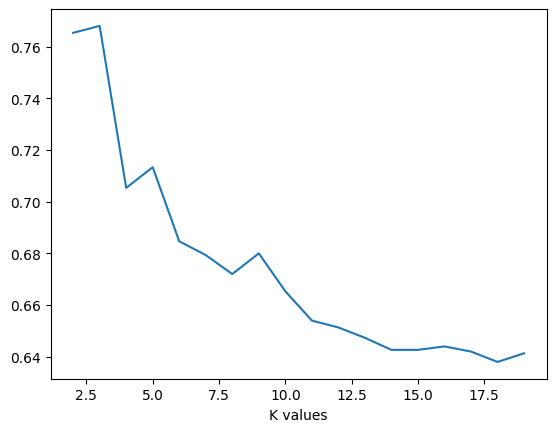

In [134]:
k = np.arange(2, 20)
sns.lineplot(x=k,y=training_acc)
plt.xlabel("K values")
plt.plot()

Testing Accuaracy Against K-values

[]

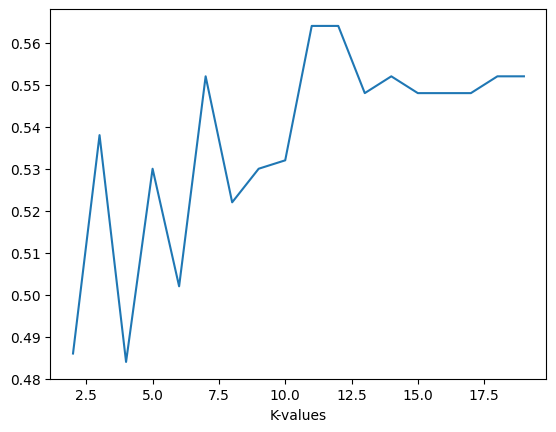

In [135]:
k=np.arange(2,20)
sns.lineplot(x=k,y=testing_acc)
plt.xlabel("K-values")
plt.plot()

#### Algorithm 14-SVM(Support vector methods)

In [136]:
svc=SVC()
svc_model=svc.fit(x_train,y_train)
svc_model

SVC()

Training Data

In [137]:
y_train_pred=svc_model.predict(x_train)

Model Evaluation using svm classifier for training data

In [138]:
print("----Model Evaluation for Training----")
ac=accuracy_score(y_train,y_train_pred)
print("Accuaracy Score",ac)
print("-"*50)

con_mat=confusion_matrix(y_train,y_train_pred)
print("Confusion Matrix\n",con_mat)
print("-"*50)

cr=classification_report(y_train,y_train_pred)
print("Classification Report\n",cr)
print("-"*50)

----Model Evaluation for Training----
Accuaracy Score 0.5953333333333334
--------------------------------------------------
Confusion Matrix
 [[  0 607]
 [  0 893]]
--------------------------------------------------
Classification Report
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       607
           1       0.60      1.00      0.75       893

    accuracy                           0.60      1500
   macro avg       0.30      0.50      0.37      1500
weighted avg       0.35      0.60      0.44      1500

--------------------------------------------------


Testing Data

In [139]:
y_test_pred=svc_model.predict(x_test)

Model Evaluation using svm classifier for testing data

In [140]:
print("----Model Evaluation for testing----")
ac=accuracy_score(y_test,y_test_pred)
print("Accuaracy Score",ac)
print("-"*50)

con_mat=confusion_matrix(y_test,y_test_pred)
print("Confusion Matrix\n",con_mat)
print("-"*50)

cr=classification_report(y_test,y_test_pred)
print("Classification Report\n",cr)
print("-"*50)

----Model Evaluation for testing----
Accuaracy Score 0.61
--------------------------------------------------
Confusion Matrix
 [[  0 195]
 [  0 305]]
--------------------------------------------------
Classification Report
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       195
           1       0.61      1.00      0.76       305

    accuracy                           0.61       500
   macro avg       0.30      0.50      0.38       500
weighted avg       0.37      0.61      0.46       500

--------------------------------------------------


ACCURACY SCORE OF EVERY ALOGRITHM

In [141]:
def store_accuracy(model_name, train_accuracy, test_accuracy, df2=None):
    new_entry = pd.DataFrame({'Model': [model_name], 'Train Accuracy': [train_accuracy], 'Test Accuracy': [test_accuracy]})
    
    if df2 is None:
        df2 = new_entry
    else:
        df2 = pd.concat([df2, new_entry], ignore_index=True)
    
    return df2

df2 = store_accuracy("Logistic Regression", 0.6, 0.602)
df2 = store_accuracy("Decision Tree", 1.0, 0.534, df2)
df2 = store_accuracy("Decision Tree Hyperparameter", 0.6326, 0.584, df2)
df2 = store_accuracy("Random Forest", 1.0, 0.576, df2)
df2 = store_accuracy("Random Forest Hyperparameter", 0.64, 0.612, df2)
df2 = store_accuracy("AdaBoost", 0.6266, 0.584, df2)
df2 = store_accuracy("AdaBoost Hyperparameter", 0.6066, 0.604, df2)
df2 = store_accuracy("GradientBoost", 0.720, 0.574, df2)
df2 = store_accuracy("GradientBoost Hyperparameter", 0.622, 0.608, df2)
df2 = store_accuracy("XGBoost", 1.0, 0.536, df2)
df2 = store_accuracy("XGBoost Hyperparameter", 0.608, 0.608, df2)
df2 = store_accuracy("KNN", 0.768, 0.538, df2)
df2 = store_accuracy("KNN Hyperparameter", 0.648, 0.554, df2)
df2 = store_accuracy("SVM", 0.595, 0.61, df2)

df2

,Model,Train Accuracy,Test Accuracy
0,Logistic Regression,0.6000,0.602
1,Decision Tree,1.0000,0.534
2,Decision Tree Hyperparameter,0.6326,0.584
3,Random Forest,1.0000,0.576
4,Random Forest Hyperparameter,0.6400,0.612
5,AdaBoost,0.6266,0.584
6,AdaBoost Hyperparameter,0.6066,0.604
7,GradientBoost,0.7200,0.574
8,GradientBoost Hyperparameter,0.6220,0.608
9,XGBoost,1.0000,0.536


Save to pickel

In [142]:
with open("predictshipping.pkl", "wb") as f:
    pickle.dump(rfc_model, f)

In [145]:
%%writefile predictingshippingdelay.py
import streamlit as st
import numpy as np
import pickle
import time

# ✅ Load Model
model_path = "predictshipping.pkl"
try:
    with open(model_path, "rb") as f:
        model = pickle.load(f)
except FileNotFoundError:
    st.error("❌ Model file not found!")
    st.stop()

# ✅ Themed UI Styling
st.set_page_config(page_title="Shipping Delay Predictor", page_icon="📦", layout="wide")
st.markdown("""
    <style>
    body {background-color: #f0f9ff; color: #2c3e50; font-family: 'Poppins', sans-serif;}
    .stButton>button {background-color: #007bff; color: white; border-radius: 20px; font-size: 18px; padding: 10px 22px;}
    .title {font-size: 48px; font-weight: bold; color: #0077b6; text-align: center;}
    .subtitle {font-size: 22px; color: #023e8a; text-align: center; font-style: italic;}
    .about-section {padding: 15px; background-color: #dff6ff; border-radius: 15px; border-left: 5px solid #00b4d8; margin-bottom: 20px;}
    </style>
    """, unsafe_allow_html=True)

st.markdown("<div class='title'>📦 Shipping Delay Predictor</div>", unsafe_allow_html=True)
st.markdown("<div class='subtitle'>🚚 Estimate shipping delays using ML predictions</div>", unsafe_allow_html=True)

with st.sidebar:
    st.header("📦 About the App")
    st.write("This app helps logistics and e-commerce teams predict delivery delays based on shipment features.")
    st.write("Built with machine learning and a focus on user-friendly experience.")
    st.header("💡 Tips")
    st.write("✔ Accurate inputs lead to better predictions.")
    st.write("✔ Use this tool for planning and optimization.")

# ✅ Input Fields
Product_Category = st.selectbox("📚 Product Category", [0, 1, 2, 3, 4], format_func=lambda x: ["Books", "Clothing", "Electronics", "Furniture", "Toys"][x])
Product_Weight = st.number_input("⚖ Product Weight (kg)", min_value=0.1, format="%.2f")
Shipping_Method = st.selectbox("🚚 Shipping Method", [0, 1, 2], format_func=lambda x: ["Express", "Overnight", "Standard"][x])
Distance = st.number_input("📍 Distance (km)", min_value=1)
Number_of_Items_in_Shipment = st.number_input("📦 Items in Shipment", min_value=1, step=1)
Mode_of_shipping = st.selectbox("🛫 Mode of Shipping", [0, 1, 2], format_func=lambda x: ["Air", "Ground", "Sea"][x])
Origin_City = st.selectbox("🏙 Origin City", [0, 1, 2, 3, 4], format_func=lambda x: ["Chicago", "Houston", "Los Angeles", "New York", "San Francisco"][x])
Destination_City = st.selectbox("🏙 Destination City", [0, 1, 2, 3, 4], format_func=lambda x: ["Chicago", "Houston", "Los Angeles", "New York", "San Francisco"][x])
Weather_Conditions = st.selectbox("🌦 Weather Conditions", [0, 1, 2, 3, 4], format_func=lambda x: ["Clear", "Fog", "Rain", "Snow", "Storm"][x])
Holiday_Indicator = st.radio("🎉 Is it a Holiday?", [0, 1], format_func=lambda x: ["No", "Yes"][x])
Warehouse_Processing_Time = st.number_input("🏭 Warehouse Processing Time (hrs)", min_value=1, step=1)
Traffic_Conditions = st.selectbox("🚦 Traffic Conditions", [0, 1, 2], format_func=lambda x: ["High", "Low", "Moderate"][x])

# ✅ Prediction Logic
if st.button("📊 Predict Delay"):
    with st.spinner('⏳ Calculating estimated delivery delay...'):
        time.sleep(2)
        input_features = [
            Product_Category, Product_Weight, Shipping_Method, Distance,
            Number_of_Items_in_Shipment, Mode_of_shipping, Origin_City,
            Destination_City, Weather_Conditions, Holiday_Indicator,
            Warehouse_Processing_Time, Traffic_Conditions
        ]
        try:
             prediction = model.predict(np.array(input_features).reshape(1, -1))
             if prediction[0] == 1:
                            st.error("🚨 Shipping Delay Detected: Yes")
                            st.info("📌 Consider notifying customers and adjusting delivery schedules.")
             else:
                            st.success("✅ No Shipping Delay Detected")
                            st.info("📌 Shipping is expected to be on time.")
        except Exception as e:
                st.error(f"❌ Prediction Error: {e}")

st.markdown("---")

Overwriting predictingshippingdelay.py
